In [12]:
#Needed in general
from __future__ import division

import numpy as np
import matplotlib.pyplot as plt
import sys
import h5py as h5
import gc

#Quick fudge to make import from ../Scripts work
sys.path.append('../../Scripts')

#Custom imports
import ClassCOMPAS     as CC ###
# import ClassFormationChannels as FC a


# import script that has formation channel classification functions:
from PostProcessingScripts import * 
from ClassFormationChannels_5mainchannels import * 



from astropy import units as u
from astropy import constants as const

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
print(fs)

import astropy
import seaborn as sns
from seaborn_utility import cmap_from_colour

24


# with LVK posteriors of GWs 

## prep code: 

In [13]:




def get_GW_posteriors(GW_list=['GW190408_181802']):
    
    # the quantiles we want to obtain, here: the median & 90% credible interval
    # so we want quantiles 0.05, 0.5 and 0.95
    y_quantiles  =  [0.05,   0.5,    0.95]   
    indexnames   = ['unit',  '0.05',  '0.5',  '0.95']
    
    # prepare DataFrame 
    xvarHeaders = ['Mass1', 'Mass2', \
                    'TotMass', 'ChirpMass', 'q', 'spin1', 'spin2', 'final_spin', 'final_mass_source' ]

    xvarUnits = ['Msun', 'Msun', 'Msun', 'Msun', '#', '#', '#', '#', 'Msun']
    
    # ALL GWTC per catalog 
    GWTC1_BNS = ['GW170817']
    GWTC1 = ['GW150914', 'GW151012', 'GW151226', 'GW170104', 'GW170608', 'GW170729',  'GW170809', 'GW170814', 'GW170817',  'GW170818', 'GW170823']
    GWTC2 = ['GW190408_181802','GW190412','GW190413_052954','GW190413_134308','GW190421_213856',\
    'GW190424_180648','GW190503_185404','GW190512_180714',\
    'GW190513_205428','GW190514_065416','GW190517_055101','GW190519_153544','GW190521_074359',\
    'GW190521','GW190527_092055','GW190602_175927','GW190620_030421','GW190630_185205','GW190701_203306',\
    'GW190706_222641','GW190707_093326','GW190708_232457','GW190720_000836',\
    'GW190727_060333','GW190728_064510','GW190731_140936','GW190803_022701','GW190828_063405',\
    'GW190828_065509','GW190910_112807','GW190915_235702','GW190924_021846','GW190929_012149',\
     'GW190930_133541', 'GW190425', 'GW190814', 'GW190426_152155']
    # O3b
    GWTC2b = ['GW200105_162426', 'GW200115_042309']
    
    
    
    
    for GW in GW_list:
        GW_ = str(GW)
        if GW in GWTC1:
            print(GW_)
            GW_file = '/Volumes/Andromeda/GWTC-1_LVK_catalog/GWTC-1_sample_release/'+GW_+'_GWTC-1.hdf5'
            GW = h5.File(GW_file, 'r')
            # GW170817 does not have an overall posterior, but insteaad low & high spin. we choose low spin. 
            if GW_ in GWTC1_BNS:
                detM1 = GW['IMRPhenomPv2NRT_lowSpin_posterior']['m1_detector_frame_Msun']
                detM2 = GW['IMRPhenomPv2NRT_lowSpin_posterior']['m2_detector_frame_Msun']
                LDistance = GW['IMRPhenomPv2NRT_lowSpin_posterior']['luminosity_distance_Mpc']
                spin1 = GW['IMRPhenomPv2NRT_lowSpin_posterior']['spin1']
                spin2 = GW['IMRPhenomPv2NRT_lowSpin_posterior']['spin2']
                costilt1 = GW['IMRPhenomPv2NRT_lowSpin_posterior']['costilt1']
                costilt2 = GW['IMRPhenomPv2NRT_lowSpin_posterior']['costilt2']

                spin1 = spin1 * costilt1
                spin2 = spin2 * costilt2
                del costilt1
                del costilt2
                
                final_spin = GW['IMRPhenomPv2NRT_lowSpin_posterior']['final_spin']
                final_mass_source = GW['IMRPhenomPv2NRT_lowSpin_posterior']['final_mass_source']
                
                
                
            else:
                detM1 = GW['Overall_posterior']['m1_detector_frame_Msun']
                detM2 = GW['Overall_posterior']['m2_detector_frame_Msun']
                LDistance = GW['Overall_posterior']['luminosity_distance_Mpc']
                spin1 = GW['Overall_posterior']['spin1']
                spin2 = GW['Overall_posterior']['spin2']
                costilt1 = GW['Overall_posterior']['costilt1']
                costilt2 = GW['Overall_posterior']['costilt2']

                spin1 = spin1 * costilt1
                spin2 = spin2 * costilt2
                del costilt1
                del costilt2
                final_spin = GW['Overall_posterior']['final_spin']
                final_mass_source = GW['Overall_posterior']['final_mass_source']
            z_ = _redshift(LDistance)
            # convert to source frame masses
            M1 = detM1 / (1+z_)
            M2 = detM2 / (1+z_)
            
            mass_1_source = M1 
            mass_2_source = M2
            total_mass_source = M1+M2
            chirp_mass_source = chirpmass(M1, M2)
            mass_ratio= M1 / M2
            


        
        
        elif GW in GWTC2:

            print(GW_)
            GW_file = '/Volumes/Andromeda/GWTC-1_LVK_catalog/GWTC-2_sample_release/' + GW_ +'_comoving.h5'
            GW = h5.File(GW_file, 'r')

            data = read(GW_file)
            samples_dict = data.samples_dict
            posterior_samples = samples_dict['PublicationSamples']
#             parameters = sorted(list(posterior_samples.keys()))

            mass_1_source = posterior_samples['mass_1_source']
            mass_2_source = posterior_samples['mass_2_source']
            total_mass_source = posterior_samples['total_mass_source']
            chirp_mass_source= posterior_samples['chirp_mass_source']
            spin1 = posterior_samples['spin_1z']
            spin2 = posterior_samples['spin_2z']
            # our mass ratio is defined the other way around
            mass_ratio = mass_1_source / mass_2_source  # is the same as: posterior_samples['inverted_mass_ratio']
            

            final_spin = posterior_samples['final_spin']
            final_mass_source = posterior_samples['final_mass_source']            

    
        
        
        elif GW_ in GWTC2b:
            print(GW_)
            GW_file = '/Volumes/Andromeda/GWTC-1_LVK_catalog/GWTC-2_sample_release/' + GW_ +'_posterior_samples_v2.h5'
            GW = h5.File(GW_file, 'r')
            print(GW['C01:Combined_PHM_high_spin']['posterior_samples']['mass_1_source'][...].squeeze())

#             data = read(GW_file)
#             samples_dict = data.samples_dict
#             posterior_samples = samples_dict['PublicationSamples']
    #             parameters = sorted(list(posterior_samples.keys()))
            posterior_samples = GW['C01:Combined_PHM_high_spin']['posterior_samples']
            mass_1_source     = posterior_samples['mass_1_source'][...].squeeze()
            mass_2_source     = posterior_samples['mass_2_source'][...].squeeze()
            total_mass_source = posterior_samples['total_mass_source'][...].squeeze()
            chirp_mass_source = posterior_samples['chirp_mass_source'][...].squeeze()
            spin1             = posterior_samples['spin_1z'][...].squeeze()
            spin2             = posterior_samples['spin_2z'][...].squeeze()
            # mass ratio
            mass_ratio = mass_2_source / mass_1_source  # is the same as: posterior_samples['inverted_mass_ratio']


            final_spin = posterior_samples['final_spin']
            final_mass_source = posterior_samples['final_mass_source']            





    # obtain BH and NS masses from combining GW posteriors.
    # by definition LIGO gives Most massive and least massive. 
    xvarlist = [mass_1_source, mass_2_source, total_mass_source, chirp_mass_source, mass_ratio, spin1, spin2]





    print('completed!')
                  
        
        
    return xvarlist
  

In [14]:
xvars_GW200105 = get_GW_posteriors(GW_list=['GW200105_162426'])
xvars_GW200115 = get_GW_posteriors(GW_list=['GW200115_042309'])

GW200105_162426
[8.37598737 8.73262229 8.41748688 ... 8.98889051 9.25655911 9.00633161]
completed!
GW200115_042309
[4.63391569 5.73221847 6.27705374 ... 4.87480358 6.58584113 7.62977064]
completed!


OSError: Can't read data (file read failed: time = Tue Aug 10 22:36:29 2021
, filename = '/Volumes/Andromeda/DATA/AllDCO_bugfix/ccSNkick_100km_s/COMPASCompactOutput_BHNS_P.h5', file descriptor = 74, errno = 5, error message = 'Input/output error', buf = 0x7f7e7dd10000, total read size = 24395664, bytes this sub-read = 24395664, bytes actually read = 18446744073709551615, offset = 128083436)

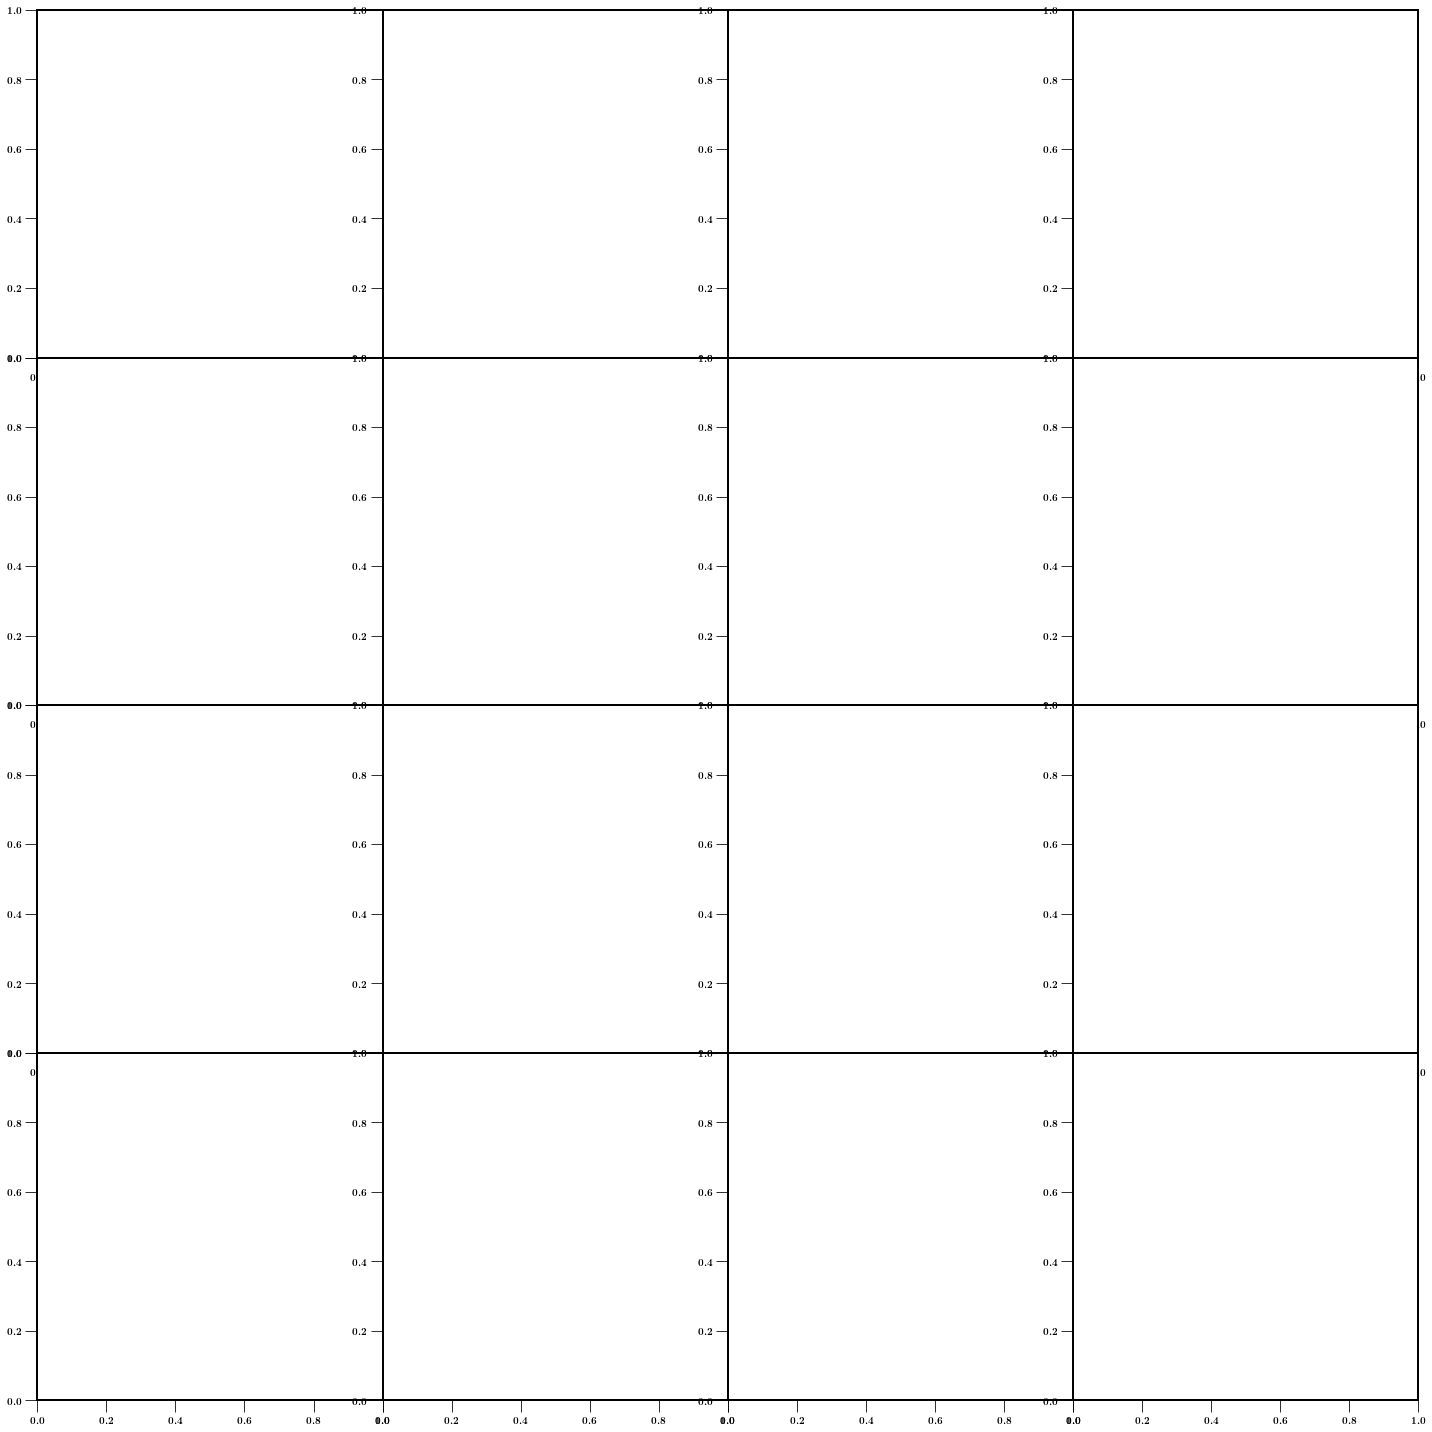

In [15]:
fs=20
def plot2DdistributionScatter(axe, var, BPSmodelName='A'):
    

    
    DCOtype='BHNS'
    # path for files 
    path_ = '/Volumes/Andromeda/DATA/AllDCO_bugfix/' + alphabetDirDict[BPSmodelName] +'/'
    path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'

    # read in data 
    fdata = h5.File(path)
    
    
    # M1 will be the most massive, M2 the least massive compact object. 
    M1, M2 = obtainM1BHandM2BHassymetric(m1=fdata['doubleCompactObjects']['M1'][...].squeeze(), m2=fdata['doubleCompactObjects']['M2'][...].squeeze()) 
    Chirpmass = chirpmass(M1, M2)
    MassRatio = M2/M1
        
    ### read in MSSFR weights: ###
    mssfr = '112' # mssfr that matches LIGO observed rates.
    # get detected weights
    fparam_key = 'weights_detected'
    weightheader = 'w_' + mssfr
    w = fdata[fparam_key][weightheader][...].squeeze()
        
    labellist=[ r'$\rm{m}_{\rm{chirp}} \ [\rm{M}_{\odot}]$', r'$\rm{m}_{\rm{BH}} \ [\rm{M}_{\odot}]$', r'$\rm{m}_{\rm{NS}} \ [\rm{M}_{\odot}]$',\
           r'$q $'] #,  r'$\log_{10}(t) $']              
    varlist = [Chirpmass, M1, M2, MassRatio]
    
    
    levels = [0.02, 0.1, 0.25, 0.5, 0.75, 0.9, 1.0]
    level_labels = [r"$98\%$", r"$90\%$", r"$75\%$", r"$50\%$", r"$25\%$", r"$10\%$", r"$0\%$"]

    
    
    maskGW200105  = ((M1 <= (8.9+1.2))  & (M1>=(8.9-1.5))) & ((M2 <= (1.9+0.3))  & (M2>=(1.9-0.2))) & ((chirpmass(M1,M2)>=(3.41-0.07)) & (chirpmass(M1,M2)<=(3.41+0.08))) & ((M2/M1>=(0.26-0.1)) & (M2/M1<=(0.26+0.35))) & (((M2+M1)>=(10.9-1.2)) & ((M2+M1)<=(10.9+1.1)))
    maskGW200115  = ((M1 <= (5.7+1.8))  & (M1>=(5.7-2.1))) & ((M2 <= (1.5+0.7))  & (M2>=(1.5-0.3))) & ((chirpmass(M1,M2)>=(2.42-0.07)) & (chirpmass(M1,M2)<=(2.42+0.05))) & ((M2/M1>=(0.26-0.1)) & (M2/M1<=(0.26+0.35))) & (((M2+M1)>=(7.1 -1.4)) & ((M2+M1)<=(7.1 +1.5)))
    
    
    
    # GW lists:
    print('obtaining GW200105 and GW200115 posteriors')
    mass_1_source_GW200105, mass_2_source_GW200105, _, chirp_mass_source_GW200105, mass_ratio_GW200105, _, _ = get_GW_posteriors(GW_list=['GW200105_162426'])
    mass_1_source_GW200115, mass_2_source_GW200115, _, chirp_mass_source_GW200115, mass_ratio_GW200115, _, _ = get_GW_posteriors(GW_list=['GW200115_042309'])
    mass_1_source_GW190426, mass_2_source_GW190426, _, chirp_mass_source_GW190426, mass_ratio_GW190426, _, _ = get_GW_posteriors(GW_list=['GW190426_152155']) 
    varlist_GW200115 = [chirp_mass_source_GW200115, mass_1_source_GW200115, mass_2_source_GW200115, mass_ratio_GW200115]
    varlist_GW200105 = [chirp_mass_source_GW200105, mass_1_source_GW200105, mass_2_source_GW200105, mass_ratio_GW200105]
    varlist_GW190426 = [chirp_mass_source_GW190426, mass_1_source_GW190426, mass_2_source_GW190426, mass_ratio_GW19042]
    
    fs_l = 20 # label fontsize
    
    cGW1 = 'lightskyblue' 
    cGW0 = 'orange'
    LEGEND = True 
    for jj, param_x in enumerate(var):
        jj_minn,jj_maxx = min(varlist[jj]), max(varlist[jj])

        for ii, param_y in enumerate(var):

            ii_minn,ii_maxx = min(varlist[ii]), max(varlist[ii])
            if ii==jj:
                nrbins=np.linspace(jj_minn, jj_maxx, 75)
                hist, bin_edges = np.histogram(varlist[jj], bins=nrbins, weights=w)
                yy = hist / np.max(hist) # normalize by max to set highest bin to fixed height 1 
                xx = (bin_edges[:-1]+ bin_edges[1:])/2 # center of bins
                axe[ii,jj].plot(xx, yy, color='lightgray', lw=3, zorder=2)
                axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=yy, color='lightgray', zorder=2, alpha=0.5)
                
                percentiles = weighted_quantile(values=varlist[jj], quantiles=[0.05, 0.95], sample_weight=w)
                print('percentiles 0.05, 0.95 of %s are %s'%(param_x, percentil))
                
                
                hist, bin_edges = np.histogram(varlist[jj][maskGW200105], bins=nrbins, weights=w[maskGW200105])
                yy = hist / np.max(hist) # normalize by max to set highest bin to fixed height 1 
                xx = (bin_edges[:-1]+ bin_edges[1:])/2 # center of bins
                axe[ii,jj].plot(xx, yy, color=cGW0, lw=3, zorder=3, ls=':')   
#                 axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=yy, color=cGW0, zorder=2, alpha=0.3)
                
                hist, bin_edges = np.histogram(varlist[jj][maskGW200115], bins=nrbins, weights=w[maskGW200115])
                yy = hist / np.max(hist) # normalize by max to set highest bin to fixed height 1 
                xx = (bin_edges[:-1]+ bin_edges[1:])/2 # center of bins
                axe[ii,jj].plot(xx, yy, color=cGW1, lw=3, zorder=3, ls=':')  
#                 axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=yy, color=cGW1, zorder=2, alpha=0.3)
                
                
                
                
                #### LVK sources ###
                nrbins = 50 
                
                hist, bin_edges = np.histogram( varlist_GW200105[jj], bins=nrbins)
                yy = hist / np.max(hist) # normalize by max to set highest bin to fixed height 1 
                xx = (bin_edges[:-1]+ bin_edges[1:])/2 # center of bins
                axe[ii,jj].plot(xx, yy, color=cGW0, lw=3, zorder=5)   
                axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=yy, color=cGW0, zorder=4, alpha=0.2)
                
                hist, bin_edges = np.histogram(varlist_GW200115[jj], bins=nrbins)
                yy = hist / np.max(hist) # normalize by max to set highest bin to fixed height 1 
                xx = (bin_edges[:-1]+ bin_edges[1:])/2 # center of bins
                axe[ii,jj].plot(xx, yy, color=cGW1, lw=3, zorder=5)  
                axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=yy, color=cGW1, zorder=4, alpha=0.2)
                #######################
                
                
                
                
                # BEAUTIFY: 
                
                ylabel='PDF'
                print('ii,jj=', ii, jj)
                axe[ii,jj].set_xlim(jj_minn, jj_maxx)
                axe[ii,jj].set_ylim(0,1)
                if param_x== r'$m_{\rm{BH}} \ [M_{\odot}]$':
                    axe[ii,jj].set_xlim(jj_minn, 27)
                if param_x==  r'$\rm{m}_{\rm{chirp}} \ [\rm{M}_{\odot}]$':
                    axe[ii,jj].set_xlim(jj_minn, 6.2)
                    
                if param_x==  r'$m_{\rm{NS}} \ [M_{\odot}]$':
                    axe[ii,jj].set_xlim(0.9, jj_maxx)                    
                    
                if param_x==r'$q $':
                    xx = [-100, -50]
                    axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=np.ones_like(xx), color='lightgray', zorder=2, alpha=0.5, label='All BHNS')
                    axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=np.ones_like(xx), color='orange', zorder=2, alpha=0.3, label = 'GW200105')
                    axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=np.ones_like(xx), color='lightskyblue', zorder=2, alpha=0.3, label = 'GW200115')
                    ax[ii,jj].legend(fontsize=26, loc='upper center', bbox_to_anchor=(0.65, 0.9), frameon=False)
                    

                if jj==(len(var)-1):
                    ax[ii,jj] == layoutAxesNoYlabel(ax[ii,jj], nameX=labellist[jj], nameY='NA', setMinor=False, labelpad=10, fontsize=fs_l)
                    

                if ii!=0:
                    axe[ii,jj].set_yticks([])
                    axe[ii,jj].set_yticklabels( () ) 
                    
                if ii==0:
                    ax[ii,jj] == layoutAxesNoXlabel(ax[ii,jj], nameX='NA', nameY=r'$\textbf{PDF}$', setMinor=False, labelpad=10, fontsize=fs_l)

            elif jj>ii:
                ax[ii,jj].set_axis_off()                    

            else:
                print('ii,jj=', ii, jj)
                axe[ii,jj].set_xlim(jj_minn, jj_maxx)
                axe[ii,jj].set_ylim(ii_minn, ii_maxx)
                # cut axes for chirp and MBH mass 
                if param_x==  r'$m_{\rm{BH}} \ [M_{\odot}]$':
                    axe[ii,jj].set_xlim(jj_minn, 27)
                if param_x== r'$\rm{m}_{\rm{chirp}} \ [\rm{M}_{\odot}]$':
                    axe[ii,jj].set_xlim(jj_minn, 6.2)
                if param_x==  r'$m_{\rm{NS}} \ [M_{\odot}]$':
                    axe[ii,jj].set_xlim(0.9, jj_maxx)  
                    
                if param_y==  r'$m_{\rm{BH}} \ [M_{\odot}]$':
                    axe[ii,jj].set_ylim(ii_minn, 27)
                if param_y==r'$\rm{m}_{\rm{chirp}} \ [\rm{M}_{\odot}]$':
                    axe[ii,jj].set_ylim(ii_minn, 6.2)                
                if param_y==  r'$m_{\rm{NS}} \ [M_{\odot}]$':
                    axe[ii,jj].set_ylim(0.9, ii_maxx)  
                    
                    
                    
                x = varlist[jj] #np.linspace(0,1,100)
                y = np.ones_like(varlist[jj])
                print(np.shape(varlist[jj]))
                print(np.shape(x))
#                 N = 10000#  len(varlist[jj])
                
    
    
    
                # plot 90% credible interval from LIGO posteriors
                sns.kdeplot(x=varlist_GW200105[jj][0:], y=varlist_GW200105[ii][0:], ax=ax[ii, jj],  color='orange', linewidth=3, shade=False, levels=[0.1], bw_method=0.3, zorder=11)
                sns.kdeplot(x=varlist_GW200115[jj][0:], y=varlist_GW200115[ii][0:], ax=ax[ii, jj],  color='lightskyblue', linewidth=3,  shade=False, levels=[0.1], bw_method=0.3, zorder=11)
                sns.kdeplot(x=varlist_GW190426[jj][0:], y=varlist_GW190426[ii][0:], ax=ax[ii, jj],  color='red', linewidth=3,  shade=False, levels=[0.1], bw_method=0.3, zorder=11)

                #                 if ii==1:
                # plot gray "ALL BHNS" contours
#                 sns.kdeplot(x=varlist[jj][0:], y=varlist[ii][0:], weights=w[0:], ax=ax[ii, jj],  color='gray', shade=True, levels=levels, bw_method=0.3, zorder=8)
                ax[ii,jj].scatter(varlist[jj][0:], varlist[ii][0:], s=140*w[0:], color='gray', zorder=4)
                
                # overplot with LIGO observations matches within simulation: show with scatter points 
                ax[ii,jj].scatter(varlist[jj][maskGW200105], varlist[ii][maskGW200105], s=140*w[maskGW200105], color='orange', zorder=10)
                ax[ii,jj].scatter(varlist[jj][maskGW200115], varlist[ii][maskGW200115], s=140*w[maskGW200115], color='lightskyblue', zorder=10)
                
                if (ii==(len(var)-1)):
                    print(ii)
                    ax[ii,jj] == layoutAxesNoYlabel(ax[ii,jj], nameX=labellist[jj], nameY='NA', setMinor=False, labelpad=10, fontsize=fs_l)
                if jj==0:
                    ax[ii,jj] == layoutAxesNoXlabel(ax[ii,jj], nameX='NA', nameY=labellist[ii], setMinor=False, labelpad=10, fontsize=fs_l)
                    
                else:
                    axe[ii,jj].set_yticks([])
                    axe[ii,jj].set_yticklabels( () ) 

    
    
    # add a color map for the gray contour lines 
    cmap = cmap_from_colour('gray')
    scatter = ax[0,0].scatter(np.ones_like(levels) * 1e-5, np.ones_like(levels) * 1e-21, c=levels, cmap=cmap)
    inset_ax = ax[1,2].inset_axes([0.25, 0.5, 1.5, 0.18])
    cbar = f.colorbar(scatter, ax=ax[0,1], cax=inset_ax, boundaries=levels, orientation="horizontal")
    cbar.set_ticklabels(level_labels)
    cbar.ax.tick_params(labelsize=26)                    

    ax[1,2].annotate('All BHNS', xy=(1.0, 0.72), xycoords="axes fraction",
                     fontsize=fs+10, color="black", ha="center", va="bottom")                     
                    
                    
                    
                    
                    
labellist=[r'$\rm{m}_{\rm{chirp}} \ [\rm{M}_{\odot}]$', r'$m_{\rm{BH}} \ [M_{\odot}]$', r'$m_{\rm{NS}} \ [M_{\odot}]$',\
           r'$q $'] #,  r'$\log_{10}(t) $']     

f, ax= plt.subplots(ncols=len(labellist),nrows=len(labellist),figsize=(20,20), 
                  gridspec_kw={"width_ratios":1.5*np.ones(len(labellist)), "height_ratios":2*np.ones(len(labellist))})

mssfr = '112' # mssfr that matches LIGO observed rates.

plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)#2)
model='P'
plot2DdistributionScatter(axe=ax, var=labellist, BPSmodelName=model)
plt.savefig('./Scatter_Final_kde_with_LV_moreBHNS_' + mssfr +'_'  + model+ '.png', transparent=False, bbox_inches="tight")
plt.show()









# TEMP 

In [ ]:
fs=20
def plot2DdistributionScatter(axe, var, BPSmodelName='A'):
    

    
    DCOtype='BHNS'
    # path for files 
    path_ = '/Volumes/Andromeda/DATA/AllDCO_bugfix/' + alphabetDirDict[BPSmodelName] +'/'
    path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'

    # read in data 
    fdata = h5.File(path)
    
    
    # M1 will be the most massive, M2 the least massive compact object. 
    M1, M2 = obtainM1BHandM2BHassymetric(m1=fdata['doubleCompactObjects']['M1'][...].squeeze(), m2=fdata['doubleCompactObjects']['M2'][...].squeeze()) 
    Chirpmass = chirpmass(M1, M2)
    MassRatio = M2/M1
        
    ### read in MSSFR weights: ###
    mssfr = '112' # mssfr that matches LIGO observed rates.
    # get detected weights
    print(fdata.keys())
    
    fparam_key = 'weights_intrinsic'
    weightheader = 'w_' + mssfr
    w = fdata[fparam_key][weightheader][...].squeeze()
        
    labellist=[ r'$\rm{m}_{\rm{chirp}} \ [\rm{M}_{\odot}]$', r'$\rm{m}_{\rm{BH}} \ [\rm{M}_{\odot}]$', r'$\rm{m}_{\rm{NS}} \ [\rm{M}_{\odot}]$',\
           r'$q $'] #,  r'$\log_{10}(t) $']              
    varlist = [Chirpmass, M1, M2, MassRatio]
    
    
    levels = [0.02, 0.1, 0.25, 0.5, 0.75, 0.9, 1.0]
    level_labels = [r"$98\%$", r"$90\%$", r"$75\%$", r"$50\%$", r"$25\%$", r"$10\%$", r"$0\%$"]

    
    
    maskGW200105  = ((M1 <= (8.9+1.2))  & (M1>=(8.9-1.5))) & ((M2 <= (1.9+0.3))  & (M2>=(1.9-0.2))) & ((chirpmass(M1,M2)>=(3.41-0.07)) & (chirpmass(M1,M2)<=(3.41+0.08))) & ((M2/M1>=(0.26-0.1)) & (M2/M1<=(0.26+0.35))) & (((M2+M1)>=(10.9-1.2)) & ((M2+M1)<=(10.9+1.1)))
    maskGW200115  = ((M1 <= (5.7+1.8))  & (M1>=(5.7-2.1))) & ((M2 <= (1.5+0.7))  & (M2>=(1.5-0.3))) & ((chirpmass(M1,M2)>=(2.42-0.07)) & (chirpmass(M1,M2)<=(2.42+0.05))) & ((M2/M1>=(0.26-0.1)) & (M2/M1<=(0.26+0.35))) & (((M2+M1)>=(7.1 -1.4)) & ((M2+M1)<=(7.1 +1.5)))
    
    
    
    # GW lists:
    print('obtaining GW200105 and GW200115 posteriors')
    mass_1_source_GW200105, mass_2_source_GW200105, _, chirp_mass_source_GW200105, mass_ratio_GW200105, _, _ = get_GW_posteriors(GW_list=['GW200105_162426'])
    mass_1_source_GW200115, mass_2_source_GW200115, _, chirp_mass_source_GW200115, mass_ratio_GW200115, _, _ = get_GW_posteriors(GW_list=['GW200115_042309'])
    
    varlist_GW200115 = [chirp_mass_source_GW200115, mass_1_source_GW200115, mass_2_source_GW200115, mass_ratio_GW200115]
    varlist_GW200105 = [chirp_mass_source_GW200105, mass_1_source_GW200105, mass_2_source_GW200105, mass_ratio_GW200105]
    
    
    fs_l = 20 # label fontsize
    
    cGW1 = 'lightskyblue' 
    cGW0 = 'orange'
    LEGEND = True 
    for jj, param_x in enumerate(var):
        jj_minn,jj_maxx = min(varlist[jj]), max(varlist[jj])

        for ii, param_y in enumerate(var):

            ii_minn,ii_maxx = min(varlist[ii]), max(varlist[ii])
            if ii==jj:
                nrbins=np.linspace(jj_minn, jj_maxx, 75)
                hist, bin_edges = np.histogram(varlist[jj], bins=nrbins, weights=w)
                yy = hist / np.max(hist) # normalize by max to set highest bin to fixed height 1 
                xx = (bin_edges[:-1]+ bin_edges[1:])/2 # center of bins
                axe[ii,jj].plot(xx, yy, color='lightgray', lw=3, zorder=2)
                axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=yy, color='lightgray', zorder=2, alpha=0.5)
                
                hist, bin_edges = np.histogram(varlist[jj][maskGW200105], bins=nrbins, weights=w[maskGW200105])
                yy = hist / np.max(hist) # normalize by max to set highest bin to fixed height 1 
                xx = (bin_edges[:-1]+ bin_edges[1:])/2 # center of bins
                axe[ii,jj].plot(xx, yy, color=cGW0, lw=3, zorder=3, ls=':')   
#                 axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=yy, color=cGW0, zorder=2, alpha=0.3)
                
                hist, bin_edges = np.histogram(varlist[jj][maskGW200115], bins=nrbins, weights=w[maskGW200115])
                yy = hist / np.max(hist) # normalize by max to set highest bin to fixed height 1 
                xx = (bin_edges[:-1]+ bin_edges[1:])/2 # center of bins
                axe[ii,jj].plot(xx, yy, color=cGW1, lw=3, zorder=3, ls=':')  
#                 axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=yy, color=cGW1, zorder=2, alpha=0.3)
                
                
                
                
                #### LVK sources ###
                nrbins = 50 
                
                hist, bin_edges = np.histogram( varlist_GW200105[jj], bins=nrbins)
                yy = hist / np.max(hist) # normalize by max to set highest bin to fixed height 1 
                xx = (bin_edges[:-1]+ bin_edges[1:])/2 # center of bins
                axe[ii,jj].plot(xx, yy, color=cGW0, lw=3, zorder=5)   
                axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=yy, color=cGW0, zorder=4, alpha=0.2)
                
                hist, bin_edges = np.histogram(varlist_GW200115[jj], bins=nrbins)
                yy = hist / np.max(hist) # normalize by max to set highest bin to fixed height 1 
                xx = (bin_edges[:-1]+ bin_edges[1:])/2 # center of bins
                axe[ii,jj].plot(xx, yy, color=cGW1, lw=3, zorder=5)  
                axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=yy, color=cGW1, zorder=4, alpha=0.2)
                #######################
                
                
                
                
                # BEAUTIFY: 
                
                ylabel='PDF'
                print('ii,jj=', ii, jj)
                axe[ii,jj].set_xlim(jj_minn, jj_maxx)
                axe[ii,jj].set_ylim(0,1)
                if param_x== r'$m_{\rm{BH}} \ [M_{\odot}]$':
                    axe[ii,jj].set_xlim(jj_minn, 27)
                if param_x==  r'$\rm{m}_{\rm{chirp}} \ [\rm{M}_{\odot}]$':
                    axe[ii,jj].set_xlim(jj_minn, 6.2)
                    
                if param_x==  r'$m_{\rm{NS}} \ [M_{\odot}]$':
                    axe[ii,jj].set_xlim(0.9, jj_maxx)                    
                    
                if param_x==r'$q $':
                    xx = [-100, -50]
                    axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=np.ones_like(xx), color='lightgray', zorder=2, alpha=0.5, label='All BHNS')
                    axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=np.ones_like(xx), color='orange', zorder=2, alpha=0.3, label = 'GW200105')
                    axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=np.ones_like(xx), color='lightskyblue', zorder=2, alpha=0.3, label = 'GW200115')
                    ax[ii,jj].legend(fontsize=26, loc='upper center', bbox_to_anchor=(0.65, 0.9), frameon=False)
                    

                if jj==(len(var)-1):
                    ax[ii,jj] == layoutAxesNoYlabel(ax[ii,jj], nameX=labellist[jj], nameY='NA', setMinor=False, labelpad=10, fontsize=fs_l)
                    

                if ii!=0:
                    axe[ii,jj].set_yticks([])
                    axe[ii,jj].set_yticklabels( () ) 
                    
                if ii==0:
                    ax[ii,jj] == layoutAxesNoXlabel(ax[ii,jj], nameX='NA', nameY=r'$\textbf{PDF}$', setMinor=False, labelpad=10, fontsize=fs_l)

            elif jj>ii:
                ax[ii,jj].set_axis_off()                    

            else:
                print('ii,jj=', ii, jj)
                axe[ii,jj].set_xlim(jj_minn, jj_maxx)
                axe[ii,jj].set_ylim(ii_minn, ii_maxx)
                # cut axes for chirp and MBH mass 
                if param_x==  r'$m_{\rm{BH}} \ [M_{\odot}]$':
                    axe[ii,jj].set_xlim(jj_minn, 27)
                if param_x== r'$\rm{m}_{\rm{chirp}} \ [\rm{M}_{\odot}]$':
                    axe[ii,jj].set_xlim(jj_minn, 6.2)
                if param_x==  r'$m_{\rm{NS}} \ [M_{\odot}]$':
                    axe[ii,jj].set_xlim(0.9, jj_maxx)  
                    
                if param_y==  r'$m_{\rm{BH}} \ [M_{\odot}]$':
                    axe[ii,jj].set_ylim(ii_minn, 27)
                if param_y==r'$\rm{m}_{\rm{chirp}} \ [\rm{M}_{\odot}]$':
                    axe[ii,jj].set_ylim(ii_minn, 6.2)                
                if param_y==  r'$m_{\rm{NS}} \ [M_{\odot}]$':
                    axe[ii,jj].set_ylim(0.9, ii_maxx)  
                    
                    
                    
                x = varlist[jj] #np.linspace(0,1,100)
                y = np.ones_like(varlist[jj])
                print(np.shape(varlist[jj]))
                print(np.shape(x))
#                 N = 10000#  len(varlist[jj])
                
    
    
    
                # plot 90% credible interval from LIGO posteriors
                sns.kdeplot(x=varlist_GW200105[jj][0:], y=varlist_GW200105[ii][0:], ax=ax[ii, jj],  color='orange', linewidth=3, shade=False, levels=[0.1], bw_method=0.3, zorder=11)
                sns.kdeplot(x=varlist_GW200115[jj][0:], y=varlist_GW200115[ii][0:], ax=ax[ii, jj],  color='lightskyblue', linewidth=3,  shade=False, levels=[0.1], bw_method=0.3, zorder=11)
#                 if ii==1:
                # plot gray "ALL BHNS" contours
#                 sns.kdeplot(x=varlist[jj][0:], y=varlist[ii][0:], weights=w[0:], ax=ax[ii, jj],  color='gray', shade=True, levels=levels, bw_method=0.3, zorder=8)
                ax[ii,jj].scatter(varlist[jj][0:], varlist[ii][0:], s=140*w[0:], color='gray', zorder=4)
                
                # overplot with LIGO observations matches within simulation: show with scatter points 
                ax[ii,jj].scatter(varlist[jj][maskGW200105], varlist[ii][maskGW200105], s=140*w[maskGW200105], color='orange', zorder=10)
                ax[ii,jj].scatter(varlist[jj][maskGW200115], varlist[ii][maskGW200115], s=140*w[maskGW200115], color='lightskyblue', zorder=10)
                
                if (ii==(len(var)-1)):
                    print(ii)
                    ax[ii,jj] == layoutAxesNoYlabel(ax[ii,jj], nameX=labellist[jj], nameY='NA', setMinor=False, labelpad=10, fontsize=fs_l)
                if jj==0:
                    ax[ii,jj] == layoutAxesNoXlabel(ax[ii,jj], nameX='NA', nameY=labellist[ii], setMinor=False, labelpad=10, fontsize=fs_l)
                    
                else:
                    axe[ii,jj].set_yticks([])
                    axe[ii,jj].set_yticklabels( () ) 

    
    
    # add a color map for the gray contour lines 
    cmap = cmap_from_colour('gray')
    scatter = ax[0,0].scatter(np.ones_like(levels) * 1e-5, np.ones_like(levels) * 1e-21, c=levels, cmap=cmap)
    inset_ax = ax[1,2].inset_axes([0.25, 0.5, 1.5, 0.18])
    cbar = f.colorbar(scatter, ax=ax[0,1], cax=inset_ax, boundaries=levels, orientation="horizontal")
    cbar.set_ticklabels(level_labels)
    cbar.ax.tick_params(labelsize=26)                    

    ax[1,2].annotate('All BHNS', xy=(1.0, 0.72), xycoords="axes fraction",
                     fontsize=fs+10, color="black", ha="center", va="bottom")                     
                    
                    
                    
                    
                    
labellist=[r'$\rm{m}_{\rm{chirp}} \ [\rm{M}_{\odot}]$', r'$m_{\rm{BH}} \ [M_{\odot}]$', r'$m_{\rm{NS}} \ [M_{\odot}]$',\
           r'$q $'] #,  r'$\log_{10}(t) $']     

f, ax= plt.subplots(ncols=len(labellist),nrows=len(labellist),figsize=(20,20), 
                  gridspec_kw={"width_ratios":1.5*np.ones(len(labellist)), "height_ratios":2*np.ones(len(labellist))})

mssfr = '112' # mssfr that matches LIGO observed rates.

plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)#2)
model='P'
plot2DdistributionScatter(axe=ax, var=labellist, BPSmodelName=model)
plt.savefig('./Scatter_Final_kde_with_LV_intrinsic_' + mssfr +'_'  + model+ '.png', transparent=False, bbox_inches="tight")
plt.show()









# Main figure 

In [ ]:
fs=20
def plot2DdistributionScatter(axe, var, BPSmodelName='A'):
    

    
    DCOtype='BHNS'
    # path for files 
    path_ = '/Volumes/Andromeda/DATA/AllDCO_bugfix/' + alphabetDirDict[BPSmodelName] +'/'
    path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'

    # read in data 
    fdata = h5.File(path)
    
    
    # M1 will be the most massive, M2 the least massive compact object. 
    M1, M2 = obtainM1BHandM2BHassymetric(m1=fdata['doubleCompactObjects']['M1'][...].squeeze(), m2=fdata['doubleCompactObjects']['M2'][...].squeeze()) 
    Chirpmass = chirpmass(M1, M2)
    MassRatio = M2/M1
        
    ### read in MSSFR weights: ###
    mssfr = '112' # mssfr that matches LIGO observed rates.
    # get detected weights
    fparam_key = 'weights_detected'
    weightheader = 'w_' + mssfr
    w = fdata[fparam_key][weightheader][...].squeeze()
        
    labellist=[ r'$\rm{m}_{\rm{chirp}} \ [\rm{M}_{\odot}]$', r'$\rm{m}_{\rm{BH}} \ [\rm{M}_{\odot}]$', r'$\rm{m}_{\rm{NS}} \ [\rm{M}_{\odot}]$',\
           r'$q $'] #,  r'$\log_{10}(t) $']              
    varlist = [Chirpmass, M1, M2, MassRatio]
    
    
    levels = [0.02, 0.1, 0.25, 0.5, 0.75, 0.9, 1.0]
    level_labels = [r"$98\%$", r"$90\%$", r"$75\%$", r"$50\%$", r"$25\%$", r"$10\%$", r"$0\%$"]

    
    
    maskGW200105  = ((M1 <= (8.9+1.2))  & (M1>=(8.9-1.5))) & ((M2 <= (1.9+0.3))  & (M2>=(1.9-0.2))) & ((chirpmass(M1,M2)>=(3.41-0.07)) & (chirpmass(M1,M2)<=(3.41+0.08))) & ((M2/M1>=(0.26-0.1)) & (M2/M1<=(0.26+0.35))) & (((M2+M1)>=(10.9-1.2)) & ((M2+M1)<=(10.9+1.1)))
    maskGW200115  = ((M1 <= (5.7+1.8))  & (M1>=(5.7-2.1))) & ((M2 <= (1.5+0.7))  & (M2>=(1.5-0.3))) & ((chirpmass(M1,M2)>=(2.42-0.07)) & (chirpmass(M1,M2)<=(2.42+0.05))) & ((M2/M1>=(0.26-0.1)) & (M2/M1<=(0.26+0.35))) & (((M2+M1)>=(7.1 -1.4)) & ((M2+M1)<=(7.1 +1.5)))
    
    fs_l = 20 # label fontsize
    
    cGW1 = 'lightskyblue' 
    cGW0 = 'orange'
    LEGEND = True 
    for jj, param_x in enumerate(var):
        jj_minn,jj_maxx = min(varlist[jj]), max(varlist[jj])

        for ii, param_y in enumerate(var):

            ii_minn,ii_maxx = min(varlist[ii]), max(varlist[ii])
            if ii==jj:
                nrbins=np.linspace(jj_minn, jj_maxx, 75)
                hist, bin_edges = np.histogram(varlist[jj], bins=nrbins, weights=w)
                yy = hist / np.max(hist) # normalize by max to set highest bin to fixed height 1 
                xx = (bin_edges[:-1]+ bin_edges[1:])/2 # center of bins
                axe[ii,jj].plot(xx, yy, color='lightgray', lw=3, zorder=2)
                axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=yy, color='lightgray', zorder=2, alpha=0.3)
                
                hist, bin_edges = np.histogram(varlist[jj][maskGW200105], bins=nrbins, weights=w[maskGW200105])
                yy = hist / np.max(hist) # normalize by max to set highest bin to fixed height 1 
                xx = (bin_edges[:-1]+ bin_edges[1:])/2 # center of bins
                axe[ii,jj].plot(xx, yy, color=cGW0, lw=3, zorder=3)   
                axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=yy, color=cGW0, zorder=2, alpha=0.3)
                
                hist, bin_edges = np.histogram(varlist[jj][maskGW200115], bins=nrbins, weights=w[maskGW200115])
                yy = hist / np.max(hist) # normalize by max to set highest bin to fixed height 1 
                xx = (bin_edges[:-1]+ bin_edges[1:])/2 # center of bins
                axe[ii,jj].plot(xx, yy, color=cGW1, lw=3, zorder=3)  
                axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=yy, color=cGW1, zorder=2, alpha=0.3)
                
                ylabel='PDF'
                print('ii,jj=', ii, jj)
                axe[ii,jj].set_xlim(jj_minn, jj_maxx)
                axe[ii,jj].set_ylim(0,1)
                if param_x== r'$m_{\rm{BH}} \ [M_{\odot}]$':
                    axe[ii,jj].set_xlim(jj_minn, 27)
                if param_x==  r'$\rm{m}_{\rm{chirp}} \ [\rm{M}_{\odot}]$':
                    axe[ii,jj].set_xlim(jj_minn, 6.2)
                    
                    
                    
                if param_x==r'$q $':
                    xx = [-100, -50]
                    axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=np.ones_like(xx), color='lightgray', zorder=2, alpha=0.3, label='All BHNS')
                    axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=np.ones_like(xx), color='orange', zorder=2, alpha=0.3, label = 'GW200105')
                    axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=np.ones_like(xx), color='lightskyblue', zorder=2, alpha=0.3, label = 'GW200115')
                    ax[ii,jj].legend(fontsize=26, loc='upper center', bbox_to_anchor=(0.65, 0.9), frameon=False)
                    

                if jj==(len(var)-1):
                    ax[ii,jj] == layoutAxesNoYlabel(ax[ii,jj], nameX=labellist[jj], nameY='NA', setMinor=False, labelpad=10, fontsize=fs_l)
                    

                if ii!=0:
                    axe[ii,jj].set_yticks([])
                    axe[ii,jj].set_yticklabels( () ) 
                    
                if ii==0:
                    ax[ii,jj] == layoutAxesNoXlabel(ax[ii,jj], nameX='NA', nameY=r'$\textbf{PDF}$', setMinor=False, labelpad=10, fontsize=fs_l)

            elif jj>ii:
                ax[ii,jj].set_axis_off()                    

            else:
                print('ii,jj=', ii, jj)
                axe[ii,jj].set_xlim(jj_minn, jj_maxx)
                axe[ii,jj].set_ylim(ii_minn, ii_maxx)
                # cut axes for chirp and MBH mass 
                if param_x==  r'$m_{\rm{BH}} \ [M_{\odot}]$':
                    axe[ii,jj].set_xlim(jj_minn, 27)
                if param_x== r'$\rm{m}_{\rm{chirp}} \ [\rm{M}_{\odot}]$':
                    axe[ii,jj].set_xlim(jj_minn, 6.2)
                if param_y==  r'$m_{\rm{BH}} \ [M_{\odot}]$':
                    axe[ii,jj].set_ylim(ii_minn, 27)
                if param_y==r'$\rm{m}_{\rm{chirp}} \ [\rm{M}_{\odot}]$':
                    axe[ii,jj].set_ylim(ii_minn, 6.2)                
                
                x = varlist[jj] #np.linspace(0,1,100)
                y = np.ones_like(varlist[jj])
                print(np.shape(varlist[jj]))
                print(np.shape(x))
#                 N = 10000#  len(varlist[jj])


                sns.kdeplot(x=varlist[jj][0:], y=varlist[ii][0:], weights=w[0:], ax=ax[ii, jj],  color='gray', shade=True, levels=levels, bw_method=0.3, zorder=9)
                ax[ii,jj].scatter(varlist[jj][0:], varlist[ii][0:], s=140*w[0:], color='gray', zorder=4)
                
                ax[ii,jj].scatter(varlist[jj][maskGW200105], varlist[ii][maskGW200105], s=140*w[maskGW200105], color='orange', zorder=10)
                ax[ii,jj].scatter(varlist[jj][maskGW200115], varlist[ii][maskGW200115], s=140*w[maskGW200115], color='lightskyblue', zorder=10)
                
                if (ii==(len(var)-1)):
                    print(ii)
                    ax[ii,jj] == layoutAxesNoYlabel(ax[ii,jj], nameX=labellist[jj], nameY='NA', setMinor=False, labelpad=10, fontsize=fs_l)
                if jj==0:
                    ax[ii,jj] == layoutAxesNoXlabel(ax[ii,jj], nameX='NA', nameY=labellist[ii], setMinor=False, labelpad=10, fontsize=fs_l)
                    
                else:
                    axe[ii,jj].set_yticks([])
                    axe[ii,jj].set_yticklabels( () ) 


    cmap = cmap_from_colour('gray')
    scatter = ax[0,0].scatter(np.ones_like(levels) * 1e-5, np.ones_like(levels) * 1e-21, c=levels, cmap=cmap)
    inset_ax = ax[1,2].inset_axes([0.25, 0.5, 1.5, 0.18])
    cbar = f.colorbar(scatter, ax=ax[0,1], cax=inset_ax, boundaries=levels, orientation="horizontal")
    cbar.set_ticklabels(level_labels)
    cbar.ax.tick_params(labelsize=26)                    

    ax[1,2].annotate('All BHNS', xy=(1.0, 0.72), xycoords="axes fraction",
                     fontsize=fs+10, color="black", ha="center", va="bottom")                     
                    
                    
                    
                    
                    
labellist=[r'$\rm{m}_{\rm{chirp}} \ [\rm{M}_{\odot}]$', r'$m_{\rm{BH}} \ [M_{\odot}]$', r'$m_{\rm{NS}} \ [M_{\odot}]$',\
           r'$q $'] #,  r'$\log_{10}(t) $']     

f, ax= plt.subplots(ncols=len(labellist),nrows=len(labellist),figsize=(20,20), 
                  gridspec_kw={"width_ratios":1.5*np.ones(len(labellist)), "height_ratios":2*np.ones(len(labellist))})

mssfr = '112' # mssfr that matches LIGO observed rates.

plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)#2)
model='P'
plot2DdistributionScatter(axe=ax, var=labellist, BPSmodelName=model)
plt.savefig('./Scatter_Final_kde_6' + mssfr +'_'  + model+ '.png', transparent=False, bbox_inches="tight")
plt.show()






In [ ]:
fs=20
def plot2DdistributionScatter(axe, var, BPSmodelName='A'):
    

    
    DCOtype='BHNS'
    # path for files 
    path_ = '/Volumes/Andromeda/DATA/AllDCO_bugfix/' + alphabetDirDict[BPSmodelName] +'/'
    path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'

    # read in data 
    fdata = h5.File(path)
    
    
    # M1 will be the most massive, M2 the least massive compact object. 
    M1, M2 = obtainM1BHandM2BHassymetric(m1=fdata['doubleCompactObjects']['M1'][...].squeeze(), m2=fdata['doubleCompactObjects']['M2'][...].squeeze()) 
    Chirpmass = chirpmass(M1, M2)
    MassRatio = M2/M1
        
    ### read in MSSFR weights: ###
    mssfr = '112' # mssfr that matches LIGO observed rates.
    # get detected weights
    fparam_key = 'weights_detected'
    weightheader = 'w_' + mssfr
    w = fdata[fparam_key][weightheader][...].squeeze()
        
    labellist=[ r'$\rm{M}_{\rm{chirp}}$', r'$\rm{M}_{\rm{BH}} \ [\rm{M}_{\odot}]$', r'$\rm{M}_{\rm{NS}} \ [\rm{M}_{\odot}]$',\
           r'$q $'] #,  r'$\log_{10}(t) $']              
    varlist = [Chirpmass, M1, M2, MassRatio]
    
    
    levels = [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 1.0]
    level_labels = [r"$95\%$", r"$90\%$", r"$75\%$", r"$50\%$", r"$25\%$", r"$10\%$", r"$0\%$"]

    
    
    maskGW200105  = ((M1 <= (8.9+1.2))  & (M1>=(8.9-1.5))) & ((M2 <= (1.9+0.3))  & (M2>=(1.9-0.2))) & ((chirpmass(M1,M2)>=(3.41-0.07)) & (chirpmass(M1,M2)<=(3.41+0.08))) & ((M2/M1>=(0.26-0.1)) & (M2/M1<=(0.26+0.35)))
    maskGW200115  = ((M1 <= (5.7+1.8))  & (M1>=(5.7-2.1))) & ((M2 <= (1.5+0.7))  & (M2>=(1.5-0.3))) & ((chirpmass(M1,M2)>=(2.42-0.07)) & (chirpmass(M1,M2)<=(2.42+0.05))) & ((M2/M1>=(0.26-0.1)) & (M2/M1<=(0.26+0.35))) 
    
    fs_l = 20 # label fontsize
    
    cGW1 = 'lightskyblue' 
    cGW0 = 'orange'
    LEGEND = True 
    for jj, param_x in enumerate(var):
        jj_minn,jj_maxx = min(varlist[jj]), max(varlist[jj])

        for ii, param_y in enumerate(var):

            ii_minn,ii_maxx = min(varlist[ii]), max(varlist[ii])
            if ii==jj:
                nrbins=np.linspace(jj_minn, jj_maxx, 70)
                hist, bin_edges = np.histogram(varlist[jj], bins=nrbins, weights=w)
                yy = hist / np.max(hist) # normalize by max to set highest bin to fixed height 1 
                xx = (bin_edges[:-1]+ bin_edges[1:])/2 # center of bins
                axe[ii,jj].plot(xx, yy, color='gray', lw=3, zorder=2)
                axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=yy, color='lightgray', zorder=2, alpha=0.4)
                
                hist, bin_edges = np.histogram(varlist[jj][maskGW200105], bins=nrbins, weights=w[maskGW200105])
                yy = hist / np.max(hist) # normalize by max to set highest bin to fixed height 1 
                xx = (bin_edges[:-1]+ bin_edges[1:])/2 # center of bins
                axe[ii,jj].plot(xx, yy, color=cGW0, lw=3, zorder=3)   
                axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=yy, color=cGW0, zorder=2, alpha=0.3)
                
                hist, bin_edges = np.histogram(varlist[jj][maskGW200115], bins=nrbins, weights=w[maskGW200115])
                yy = hist / np.max(hist) # normalize by max to set highest bin to fixed height 1 
                xx = (bin_edges[:-1]+ bin_edges[1:])/2 # center of bins
                axe[ii,jj].plot(xx, yy, color=cGW1, lw=3, zorder=3)  
                axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=yy, color=cGW1, zorder=2, alpha=0.3)
                
                ylabel='PDF'
                print('ii,jj=', ii, jj)
                axe[ii,jj].set_xlim(jj_minn, jj_maxx)
                axe[ii,jj].set_ylim(0,1)
                if param_x== r'$M_{\rm{BH}} \ [M_{\odot}]$':
                    axe[ii,jj].set_xlim(jj_minn, 27)
                if param_x==  r'$M_{\rm{chirp}}$':
                    axe[ii,jj].set_xlim(jj_minn, 6.2)
        
                
                if param_x==r'$q $':
                    xx = [-100, -50]
                    axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=np.ones_like(xx), color='lightgray', zorder=2, alpha=0.4, label='All BHNS')
                    axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=np.ones_like(xx), color='orange', zorder=2, alpha=0.3, label = 'GW200105')
                    axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=np.ones_like(xx), color='lightskyblue', zorder=2, alpha=0.3, label = 'GW200115')
#                     ax[ii,jj].set_legend(fontsize=24, loc='top right')
                    ax[ii,jj].legend(fontsize=26, loc='upper center', bbox_to_anchor=(0.65, 0.9), frameon=False)
                    

                if jj==(len(var)-1):
                    ax[ii,jj] == layoutAxesNoYlabel(ax[ii,jj], nameX=labellist[jj], nameY='NA', setMinor=False, labelpad=10, fontsize=fs_l)
                    

                if ii!=0:
                    axe[ii,jj].set_yticks([])
                    axe[ii,jj].set_yticklabels( () ) 
                    
                if ii==0:
                    ax[ii,jj] == layoutAxesNoXlabel(ax[ii,jj], nameX='NA', nameY=r'$\textbf{PDF}$', setMinor=False, labelpad=10, fontsize=fs_l)

            elif jj>ii:
                ax[ii,jj].set_axis_off()                    

            else:
                print('ii,jj=', ii, jj)
                axe[ii,jj].set_xlim(jj_minn, jj_maxx)
                axe[ii,jj].set_ylim(ii_minn, ii_maxx)
                
                if param_x==  r'$M_{\rm{BH}} \ [M_{\odot}]$':
                    axe[ii,jj].set_xlim(jj_minn, 27)
                if param_x== r'$M_{\rm{chirp}}$':
                    axe[ii,jj].set_xlim(jj_minn, 6.2)
                if param_y==  r'$M_{\rm{BH}} \ [M_{\odot}]$':
                    axe[ii,jj].set_ylim(ii_minn, 27)
                if param_y==  r'$M_{\rm{chirp}}$':
                    axe[ii,jj].set_ylim(ii_minn, 6.2)
                    
                x = varlist[jj] #np.linspace(0,1,100)
                y = np.ones_like(varlist[jj])
                print(np.shape(varlist[jj]))
                print(np.shape(x))
                N = 1000#  len(varlist[jj])
                
#                 if jj==1:
#                     sns.kdeplot(x=varlist[jj][0:N], y=varlist[ii][0:N], weights=w[0:N], ax=ax[ii, jj],  color='gray', shade=True, levels=levels, bw_method=0.3, zorder=9)# bw_adjust=.6)# , levels=[0.5, 0.68, 0.98], bw_method=10)
#                     ax[ii,jj].scatter(varlist[jj][0:], varlist[ii][0:], s=140*w[0:], color='gray', zorder=4)

#                     sns.kdeplot(varlist[jj][0:N], varlist[ii][0:N], weights=w[0:N], ax=ax[ii, jj],  color='gray', fill=True, levels=levels,\
#                                                       bw_adjust=1.0)# , levels=[0.5, 0.68, 0.98], bw_method=10)
                
#                 ax[ii,jj] = sns.kdeplot(x=varlist[jj], y=varlist[ii], fill=True, color='r', shade=True, Label='Iris_Setosa',
#             cmap="Reds", shade_lowest=False)
#                 ax[ii,jj].scatter(varlist[jj], varlist[ii], s=140*w, color='lightgray', zorder=1)
                ax[ii,jj].scatter(varlist[jj][maskGW200105], varlist[ii][maskGW200105], s=140*w[maskGW200105], color='orange', zorder=10)
                ax[ii,jj].scatter(varlist[jj][maskGW200115], varlist[ii][maskGW200115], s=140*w[maskGW200115], color='lightskyblue', zorder=10)
                
                if (ii==(len(var)-1)):
                    print(ii)
#                     ax[ii,jj].set_xlabel(labellist[jj], fontsize=fs)
                    ax[ii,jj] == layoutAxesNoYlabel(ax[ii,jj], nameX=labellist[jj], nameY='NA', setMinor=False, labelpad=10, fontsize=fs_l)
                if jj==0:
#                     ax[ii,jj].set_ylabel(labellist[ii], fontsize=fs)
                    ax[ii,jj] == layoutAxesNoXlabel(ax[ii,jj], nameX='NA', nameY=labellist[ii], setMinor=False, labelpad=10, fontsize=fs_l)
                    
                else:
                    axe[ii,jj].set_yticks([])
                    axe[ii,jj].set_yticklabels( () ) 


                    
    cmap = cmap_from_colour('gray')
    scatter = ax[0,0].scatter(np.ones_like(levels) * 1e-5, np.ones_like(levels) * 1e-21, c=levels, cmap=cmap)
    inset_ax = ax[1,2].inset_axes([0.25, 0.5, 1.5, 0.18])
    cbar = f.colorbar(scatter, ax=ax[0,1], cax=inset_ax, boundaries=levels, orientation="horizontal")
    cbar.set_ticklabels(level_labels)
    cbar.ax.tick_params(labelsize=26)                    

    ax[1,2].annotate('All BHNS', xy=(1.0, 0.72), xycoords="axes fraction",
                     fontsize=fs+10, color="black", ha="center", va="bottom")                    
                    
                    
                    
                    
                    
                    
labellist=[ r'$M_{\rm{chirp}}$', r'$M_{\rm{BH}} \ [M_{\odot}]$', r'$M_{\rm{NS}} \ [M_{\odot}]$',\
           r'$q $'] #,  r'$\log_{10}(t) $']     


f, ax= plt.subplots(ncols=len(labellist),nrows=len(labellist),figsize=(20,20), 
                  gridspec_kw={"width_ratios":1.5*np.ones(len(labellist)), "height_ratios":2*np.ones(len(labellist))})

mssfr = '112' # mssfr that matches LIGO observed rates.

plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)#2)
model='P'
plot2DdistributionScatter(axe=ax, var=labellist, BPSmodelName=model)
# plt.savefig('./Scatter_Final_kde_' + mssfr +'_'  + model+ '.png', transparent=False, bbox_inches="tight")
plt.show()






# ZAMS 

ii,jj= 0 0
percentiles 0.05, 0.95 of $m_{\rm{1,ZAMS}} \ [\rm{M}_{\odot}]$ are [ 26.1768     111.98227831]
ii,jj= 1 0
(3049458,)
(3049458,)
ii,jj= 2 0
(3049458,)
(3049458,)
ii,jj= 3 0
(3049458,)
(3049458,)
3
ii,jj= 1 1
percentiles 0.05, 0.95 of $m_{\rm{2,ZAMS}} \ [\rm{M}_{\odot}]$ are [13.1455    25.0797544]
ii,jj= 2 1
(3049458,)
(3049458,)
ii,jj= 3 1
(3049458,)
(3049458,)
3
ii,jj= 2 2
percentiles 0.05, 0.95 of $\log(a_{\rm{ZAMS}})\, [\rm{AU}]$ are [0.03975904 1.47329133]
ii,jj= 3 2
(3049458,)
(3049458,)
3
ii,jj= 3 3
percentiles 0.05, 0.95 of $q_{\rm{ZAMS}}$ are [0.17763974 0.74097531]


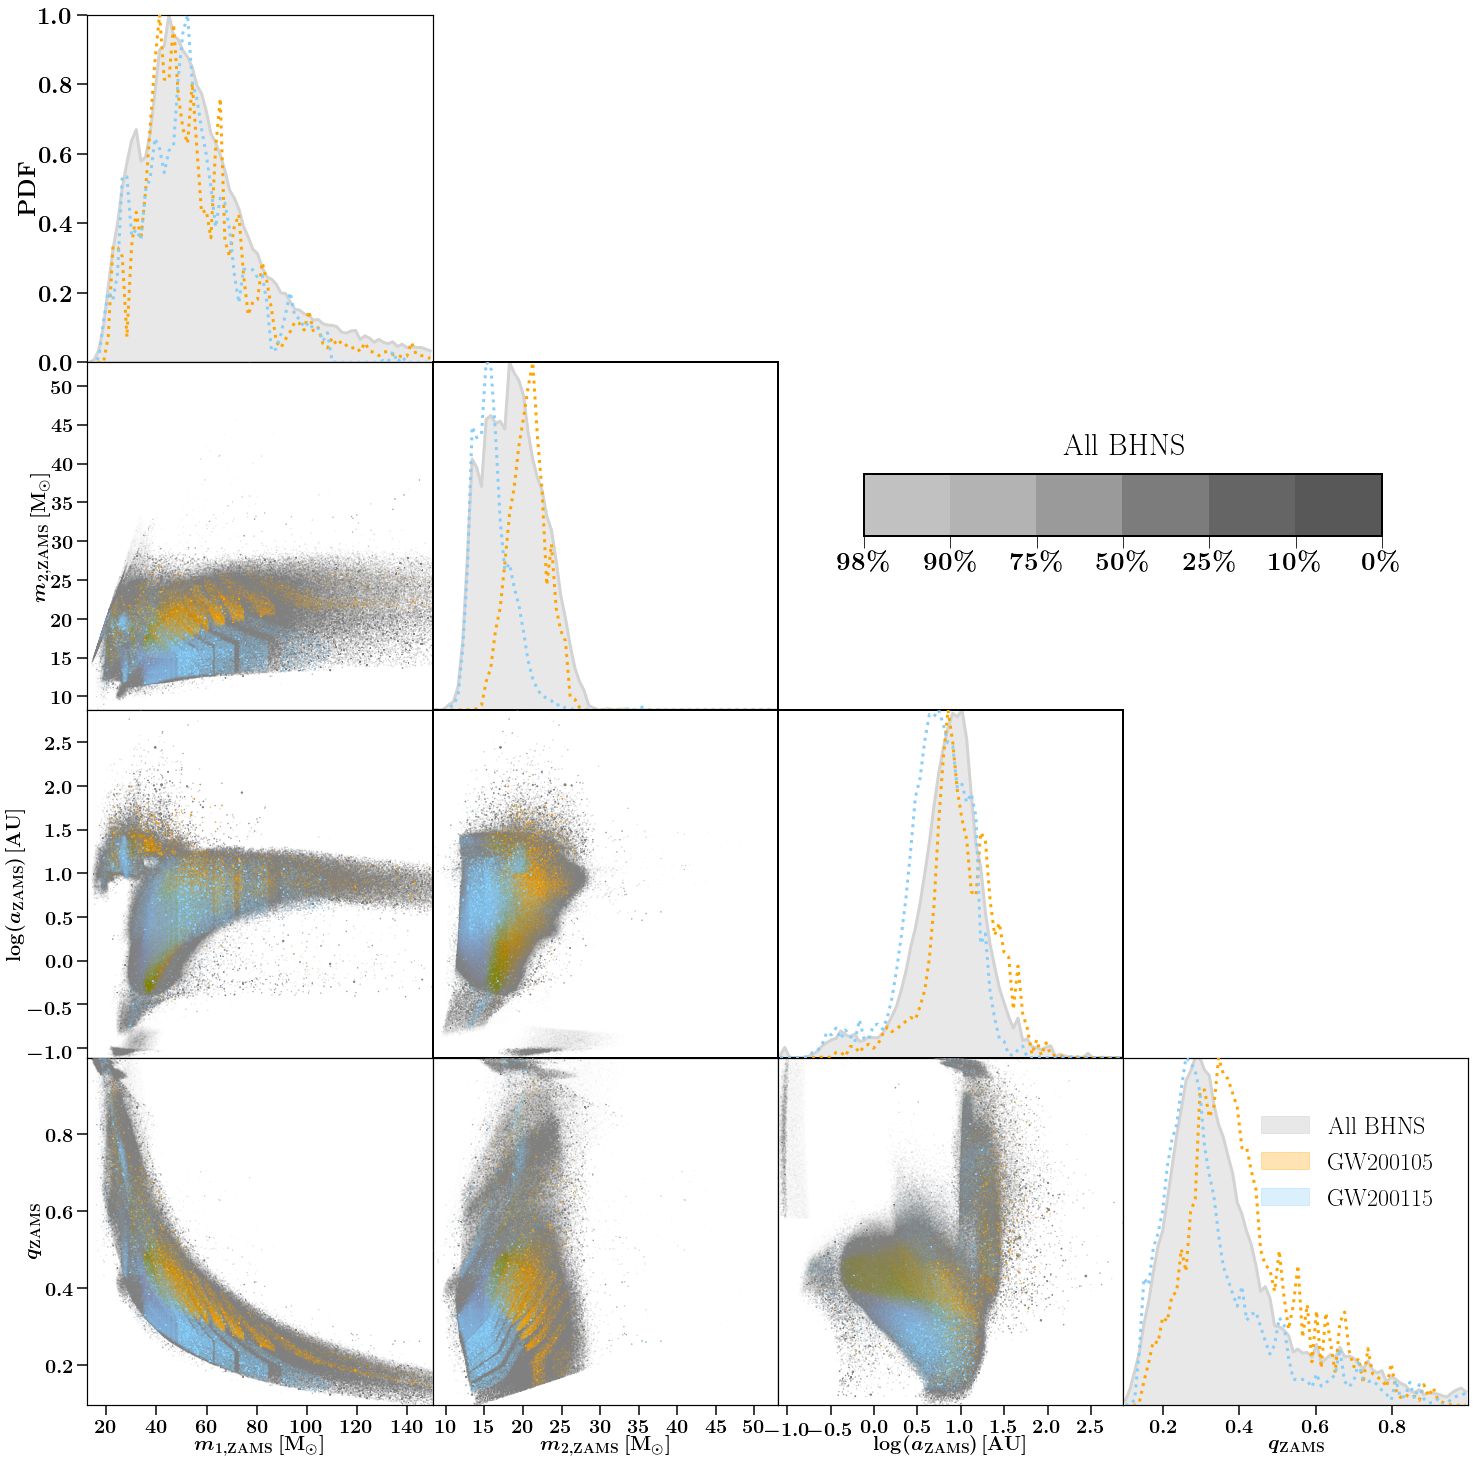

In [8]:
fs=20
def plot2DdistributionScatter(axe, var, BPSmodelName='A'):
    

    
    DCOtype='BHNS'
    # path for files 
    path_ = '/Volumes/Andromeda/DATA/AllDCO_bugfix/' + alphabetDirDict[BPSmodelName] +'/'
    path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'

    # read in data 
    fdata = h5.File(path)
    
    
    # M1 will be the most massive, M2 the least massive compact object. 
    M1, M2 = obtainM1BHandM2BHassymetric(m1=fdata['doubleCompactObjects']['M1'][...].squeeze(), m2=fdata['doubleCompactObjects']['M2'][...].squeeze()) 
    Chirpmass = chirpmass(M1, M2)
    MassRatio = M2/M1
        
    ### read in MSSFR weights: ###
    mssfr = '112' # mssfr that matches LIGO observed rates.
    # get detected weights
    fparam_key = 'weights_detected'
    weightheader = 'w_' + mssfr
    w = fdata[fparam_key][weightheader][...].squeeze()
        
    labellist=[ r'$m_{\rm{1,ZAMS}} \ [\rm{M}_{\odot}]$', r'$m_{\rm{2,ZAMS}} \ [\rm{M}_{\odot}]$',\
           r'$\log(a_{\rm{ZAMS}})\, [\rm{AU}]$', r'$q_{\rm{ZAMS}}$'] #,  r'$\log_{10}(t) $']      
    
    
    
    M1ZAMS = fdata['doubleCompactObjects']['M1ZAMS'][...].squeeze()
    M2ZAMS = fdata['doubleCompactObjects']['M2ZAMS'][...].squeeze()
    separationInitial = np.log10(fdata['doubleCompactObjects']['separationInitial'][...].squeeze())
    Metallicity = np.log10(fdata['doubleCompactObjects']['Metallicity1'][...].squeeze())
    massRatio = M2ZAMS / M1ZAMS 
    
    varlist = [M1ZAMS, M2ZAMS, separationInitial, massRatio]
    
    
    levels = [0.02, 0.1, 0.25, 0.5, 0.75, 0.9, 1.0]
    level_labels = [r"$98\%$", r"$90\%$", r"$75\%$", r"$50\%$", r"$25\%$", r"$10\%$", r"$0\%$"]

    
    
    maskGW200105  = ((M1 <= (8.9+1.2))  & (M1>=(8.9-1.5))) & ((M2 <= (1.9+0.3))  & (M2>=(1.9-0.2))) & ((chirpmass(M1,M2)>=(3.41-0.07)) & (chirpmass(M1,M2)<=(3.41+0.08))) & ((M2/M1>=(0.26-0.1)) & (M2/M1<=(0.26+0.35))) & (((M2+M1)>=(10.9-1.2)) & ((M2+M1)<=(10.9+1.1)))
    maskGW200115  = ((M1 <= (5.7+1.8))  & (M1>=(5.7-2.1))) & ((M2 <= (1.5+0.7))  & (M2>=(1.5-0.3))) & ((chirpmass(M1,M2)>=(2.42-0.07)) & (chirpmass(M1,M2)<=(2.42+0.05))) & ((M2/M1>=(0.26-0.1)) & (M2/M1<=(0.26+0.35))) & (((M2+M1)>=(7.1 -1.4)) & ((M2+M1)<=(7.1 +1.5)))
    
    fs_l = 20 # label fontsize
    
    cGW1 = 'lightskyblue' 
    cGW0 = 'orange'
    LEGEND = True 
    for jj, param_x in enumerate(var):
        jj_minn,jj_maxx = min(varlist[jj]), max(varlist[jj])

        for ii, param_y in enumerate(var):

            ii_minn,ii_maxx = min(varlist[ii]), max(varlist[ii])
            if ii==jj:
                nrbins=np.linspace(jj_minn, jj_maxx, 75)
                hist, bin_edges = np.histogram(varlist[jj], bins=nrbins, weights=w)
                yy = hist / np.max(hist) # normalize by max to set highest bin to fixed height 1 
                xx = (bin_edges[:-1]+ bin_edges[1:])/2 # center of bins
                axe[ii,jj].plot(xx, yy, color='lightgray', lw=3, zorder=2)
                axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=yy, color='lightgray', zorder=2, alpha=0.5)
                
                hist, bin_edges = np.histogram(varlist[jj][maskGW200105], bins=nrbins, weights=w[maskGW200105])
                yy = hist / np.max(hist) # normalize by max to set highest bin to fixed height 1 
                xx = (bin_edges[:-1]+ bin_edges[1:])/2 # center of bins
                axe[ii,jj].plot(xx, yy, color=cGW0, lw=3, zorder=3, ls=':')   
#                 axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=yy, color=cGW0, zorder=2, alpha=0.3)
                
                hist, bin_edges = np.histogram(varlist[jj][maskGW200115], bins=nrbins, weights=w[maskGW200115])
                yy = hist / np.max(hist) # normalize by max to set highest bin to fixed height 1 
                xx = (bin_edges[:-1]+ bin_edges[1:])/2 # center of bins
                axe[ii,jj].plot(xx, yy, color=cGW1, lw=3, zorder=3, ls=':')  
#                 axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=yy, color=cGW1, zorder=2, alpha=0.3)
                
                ylabel='PDF'
                print('ii,jj=', ii, jj)
                axe[ii,jj].set_xlim(jj_minn, jj_maxx)
                axe[ii,jj].set_ylim(0,1)
#                 if param_x== r'$M_{\rm{BH}} \ [M_{\odot}]$':
#                     axe[ii,jj].set_xlim(jj_minn, 27)
#                 if param_x==  r'$M_{\rm{chirp}}$':
#                     axe[ii,jj].set_xlim(jj_minn, 6.2)
                    
                percentiles = weighted_quantile(values=varlist[jj], quantiles=[0.05, 0.95], sample_weight=w)
                print('percentiles 0.05, 0.95 of %s are %s'%(labellist[ii], percentiles))                    
                    
                if param_x==r'$q $':
                    xx = [-100, -50]
                    axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=np.ones_like(xx), color='lightgray', zorder=2, alpha=0.5, label='All BHNS')
                    axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=np.ones_like(xx), color='orange', zorder=2, alpha=0.3, label = 'GW200105')
                    axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=np.ones_like(xx), color='lightskyblue', zorder=2, alpha=0.3, label = 'GW200115')
                    ax[ii,jj].legend(fontsize=24, loc='upper center', bbox_to_anchor=(0.65, 0.9), frameon=False)
                    

                if jj==(len(var)-1):
                    ax[ii,jj] == layoutAxesNoYlabel(ax[ii,jj], nameX=labellist[jj], nameY='NA', setMinor=False, labelpad=10, fontsize=fs_l)
                    

                if ii!=0:
                    axe[ii,jj].set_yticks([])
                    axe[ii,jj].set_yticklabels( () ) 
                    
                if ii==0:
                    ax[ii,jj] == layoutAxesNoXlabel(ax[ii,jj], nameX='NA', nameY=r'$\textbf{PDF}$', setMinor=False, labelpad=10, fontsize=fs_l+4)

            elif jj>ii:
                ax[ii,jj].set_axis_off()                    

            else:
                print('ii,jj=', ii, jj)
                axe[ii,jj].set_xlim(jj_minn, jj_maxx)
                axe[ii,jj].set_ylim(ii_minn, ii_maxx)
                # cut axes for chirp and MBH mass 
#                 if param_x==  r'$M_{\rm{BH}} \ [M_{\odot}]$':
#                     axe[ii,jj].set_xlim(jj_minn, 27)
#                 if param_x== r'$M_{\rm{chirp}}$':
#                     axe[ii,jj].set_xlim(jj_minn, 6.2)
#                 if param_y==  r'$M_{\rm{BH}} \ [M_{\odot}]$':
#                     axe[ii,jj].set_ylim(ii_minn, 27)
#                 if param_y==  r'$M_{\rm{chirp}}$':
#                     axe[ii,jj].set_ylim(ii_minn, 6.2)                
                
                x = varlist[jj] #np.linspace(0,1,100)
                y = np.ones_like(varlist[jj])
                print(np.shape(varlist[jj]))
                print(np.shape(x))
#                 N = 10000#  len(varlist[jj])


                sns.kdeplot(x=varlist[jj][0:], y=varlist[ii][0:], weights=w[0:], ax=ax[ii, jj],  color='gray', shade=True, levels=levels, bw_method=0.3, zorder=9)
                ax[ii,jj].scatter(varlist[jj][0:], varlist[ii][0:], s=140*w[0:], color='gray', zorder=4)
                
                ax[ii,jj].scatter(varlist[jj][maskGW200105], varlist[ii][maskGW200105], s=140*w[maskGW200105], color='orange', zorder=10)
                ax[ii,jj].scatter(varlist[jj][maskGW200115], varlist[ii][maskGW200115], s=140*w[maskGW200115], color='lightskyblue', zorder=10)
                
                if (ii==(len(var)-1)):
                    print(ii)
                    ax[ii,jj] == layoutAxesNoYlabel(ax[ii,jj], nameX=labellist[jj], nameY='NA', setMinor=False, labelpad=10, fontsize=fs_l)
                if jj==0:
                    ax[ii,jj] == layoutAxesNoXlabel(ax[ii,jj], nameX='NA', nameY=labellist[ii], setMinor=False, labelpad=10, fontsize=fs_l)
                    
                else:
                    axe[ii,jj].set_yticks([])
                    axe[ii,jj].set_yticklabels( () ) 


    cmap = cmap_from_colour('gray')
    scatter = ax[0,0].scatter(np.ones_like(levels) * 1e-5, np.ones_like(levels) * 1e-21, c=levels, cmap=cmap)
    inset_ax = ax[1,2].inset_axes([0.25, 0.5, 1.5, 0.18])
    cbar = f.colorbar(scatter, ax=ax[0,1], cax=inset_ax, boundaries=levels, orientation="horizontal")
    cbar.set_ticklabels(level_labels)
    cbar.ax.tick_params(labelsize=26)                    

    ax[1,2].annotate('All BHNS', xy=(1.0, 0.72), xycoords="axes fraction",
                     fontsize=fs+10, color="black", ha="center", va="bottom")                     
                    
                    
                    
                    
                    
                    
labellist=[ r'$M_{\rm{chirp}}$', r'$M_{\rm{BH}} \ [M_{\odot}]$', r'$M_{\rm{NS}} \ [M_{\odot}]$',\
           r'$q $'] #,  r'$\log_{10}(t) $']                     
f, ax= plt.subplots(ncols=len(labellist),nrows=len(labellist),figsize=(20,20), 
                  gridspec_kw={"width_ratios":1.5*np.ones(len(labellist)), "height_ratios":2*np.ones(len(labellist))})

mssfr = '112' # mssfr that matches LIGO observed rates.

plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)#2)
model='P'
plot2DdistributionScatter(axe=ax, var=labellist, BPSmodelName=model)
plt.savefig('./Scatter_ZAMS_3_' + mssfr +'_'  + model+ '.png', transparent=False, bbox_inches="tight")
plt.show()




In [9]:
np.log10(0.04)

-1.3979400086720375

In [10]:
np.log10(1.47)



0.1673173347481761

In [ ]:
# fs=20
# def plot2DdistributionScatter(axe, var, BPSmodelName='A'):
    

    
#     DCOtype='BHNS'
#     # path for files 
#     path_ = '/Volumes/Andromeda/DATA/AllDCO_bugfix/' + alphabetDirDict[BPSmodelName] +'/'
#     path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'

#     # read in data 
#     fdata = h5.File(path)
    
    
#     # M1 will be the most massive, M2 the least massive compact object. 
#     M1, M2 = obtainM1BHandM2BHassymetric(m1=fdata['doubleCompactObjects']['M1'][...].squeeze(), m2=fdata['doubleCompactObjects']['M2'][...].squeeze()) 
#     Chirpmass = chirpmass(M1, M2)
#     MassRatio = M2/M1
        
#     ### read in MSSFR weights: ###
#     mssfr = '112' # mssfr that matches LIGO observed rates.
#     # get detected weights
#     fparam_key = 'weights_detected'
#     weightheader = 'w_' + mssfr
#     w = fdata[fparam_key][weightheader][...].squeeze()
        
#     labellist=[ r'$\rm{M}_{\rm{chirp}}$', r'$\rm{M}_{\rm{BH}} \ [\rm{M}_{\odot}]$', r'$\rm{M}_{\rm{NS}} \ [\rm{M}_{\odot}]$',\
#            r'$q $'] #,  r'$\log_{10}(t) $']              
#     varlist = [Chirpmass, M1, M2, MassRatio]
    
    
#     maskGW200105  = ((M1 <= (8.9+1.2))  & (M1>=(8.9-1.5))) & ((M2 <= (1.9+0.3))  & (M2>=(1.9-0.2))) & ((chirpmass(M1,M2)>=(3.41-0.07)) & (chirpmass(M1,M2)<=(3.41+0.08))) & ((M2/M1>=(0.26-0.1)) & (M2/M1<=(0.26+0.35)))
#     maskGW200115  = ((M1 <= (5.7+1.8))  & (M1>=(5.7-2.1))) & ((M2 <= (1.5+0.7))  & (M2>=(1.5-0.3))) & ((chirpmass(M1,M2)>=(2.42-0.07)) & (chirpmass(M1,M2)<=(2.42+0.05))) & ((M2/M1>=(0.26-0.1)) & (M2/M1<=(0.26+0.35))) 
    
#     fs_l = 20 # label fontsize
    
#     cGW1 = 'lightskyblue' 
#     cGW0 = 'orange'
#     LEGEND = True 
#     for jj, param_x in enumerate(var):
#         jj_minn,jj_maxx = min(varlist[jj]), max(varlist[jj])

#         for ii, param_y in enumerate(var):

#             ii_minn,ii_maxx = min(varlist[ii]), max(varlist[ii])
#             if ii==jj:
#                 nrbins=np.linspace(jj_minn, jj_maxx, 100)
#                 hist, bin_edges = np.histogram(varlist[jj], bins=nrbins, weights=w)
#                 yy = hist / np.max(hist) # normalize by max to set highest bin to fixed height 1 
#                 xx = (bin_edges[:-1]+ bin_edges[1:])/2 # center of bins
#                 axe[ii,jj].plot(xx, yy, color='lightgray', lw=2, zorder=2)
#                 axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=yy, color='lightgray', zorder=2, alpha=0.3)
                
#                 hist, bin_edges = np.histogram(varlist[jj][maskGW200105], bins=nrbins, weights=w[maskGW200105])
#                 yy = hist / np.max(hist) # normalize by max to set highest bin to fixed height 1 
#                 xx = (bin_edges[:-1]+ bin_edges[1:])/2 # center of bins
#                 axe[ii,jj].plot(xx, yy, color=cGW0, lw=2, zorder=3)   
#                 axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=yy, color=cGW0, zorder=2, alpha=0.3)
                
#                 hist, bin_edges = np.histogram(varlist[jj][maskGW200115], bins=nrbins, weights=w[maskGW200115])
#                 yy = hist / np.max(hist) # normalize by max to set highest bin to fixed height 1 
#                 xx = (bin_edges[:-1]+ bin_edges[1:])/2 # center of bins
#                 axe[ii,jj].plot(xx, yy, color=cGW1, lw=2, zorder=3)  
#                 axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=yy, color=cGW1, zorder=2, alpha=0.3)
                
#                 ylabel='PDF'
#                 print('ii,jj=', ii, jj)
#                 axe[ii,jj].set_xlim(jj_minn, jj_maxx)
#                 axe[ii,jj].set_ylim(0,1)
                
#                 if param_x==r'$q $':
#                     xx = [-100, -50]
#                     axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=np.ones_like(xx), color='lightgray', zorder=2, alpha=0.3, label='All BHNS')
#                     axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=np.ones_like(xx), color='orange', zorder=2, alpha=0.3, label = 'GW200105')
#                     axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=np.ones_like(xx), color='lightskyblue', zorder=2, alpha=0.3, label = 'GW200115')
# #                     ax[ii,jj].set_legend(fontsize=24, loc='top right')
#                     ax[ii,jj].legend(fontsize=26, loc='upper center', bbox_to_anchor=(0.65, 0.9), frameon=False)
                    

#                 if jj==(len(var)-1):
#                     ax[ii,jj] == layoutAxesNoYlabel(ax[ii,jj], nameX=labellist[jj], nameY='NA', setMinor=False, labelpad=10, fontsize=fs_l)
                    

#                 if ii!=0:
#                     axe[ii,jj].set_yticks([])
#                     axe[ii,jj].set_yticklabels( () ) 
                    
#                 if ii==0:
#                     ax[ii,jj] == layoutAxesNoXlabel(ax[ii,jj], nameX='NA', nameY=r'$\textbf{PDF}$', setMinor=False, labelpad=10, fontsize=fs_l)

#             elif jj>ii:
#                 ax[ii,jj].set_axis_off()                    

#             else:
#                 print('ii,jj=', ii, jj)
#                 axe[ii,jj].set_xlim(jj_minn, jj_maxx)
#                 axe[ii,jj].set_ylim(ii_minn, ii_maxx)
#                 ax[ii,jj].scatter(varlist[jj], varlist[ii], s=140*w, color='lightgray', zorder=1, alpha=0.1)
#                 ax[ii,jj].scatter(varlist[jj][maskGW200105], varlist[ii][maskGW200105], s=140*w[maskGW200105], color='orange', zorder=10)
#                 ax[ii,jj].scatter(varlist[jj][maskGW200115], varlist[ii][maskGW200115], s=140*w[maskGW200115], color='lightskyblue', zorder=10)
                
#                 if (ii==(len(var)-1)):
#                     print(ii)
# #                     ax[ii,jj].set_xlabel(labellist[jj], fontsize=fs)
#                     ax[ii,jj] == layoutAxesNoYlabel(ax[ii,jj], nameX=labellist[jj], nameY='NA', setMinor=False, labelpad=10, fontsize=fs_l)
#                 if jj==0:
# #                     ax[ii,jj].set_ylabel(labellist[ii], fontsize=fs)
#                     ax[ii,jj] == layoutAxesNoXlabel(ax[ii,jj], nameX='NA', nameY=labellist[ii], setMinor=False, labelpad=10, fontsize=fs_l)
                    
#                 else:
#                     axe[ii,jj].set_yticks([])
#                     axe[ii,jj].set_yticklabels( () ) 

# labellist=[ r'$M_{\rm{chirp}}$', r'$M_{\rm{BH}} \ [M_{\odot}]$', r'$M_{\rm{NS}} \ [M_{\odot}]$',\
#            r'$q $'] #,  r'$\log_{10}(t) $']     

# f, ax= plt.subplots(ncols=len(labellist),nrows=len(labellist),figsize=(20,20), 
#                   gridspec_kw={"width_ratios":1.5*np.ones(len(labellist)), "height_ratios":2*np.ones(len(labellist))})

# mssfr = '112' # mssfr that matches LIGO observed rates.

# plt.tight_layout()
# plt.subplots_adjust(wspace=0, hspace=0)#2)
# model='P'
# plot2DdistributionScatter(axe=ax, var=labellist, BPSmodelName=model)
# plt.savefig('./Scatter_Final' + mssfr +'_'  + model+ '.png', transparent=False, bbox_inches="tight")
# plt.show()






In [ ]:
# fs=20
# def plot2DdistributionScatter(axe, var, BPSmodelName='A'):
    

    
#     DCOtype='BHNS'
#     # path for files 
#     path_ = '/Volumes/Andromeda/DATA/AllDCO_bugfix/' + alphabetDirDict[BPSmodelName] +'/'
#     path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'

#     # read in data 
#     fdata = h5.File(path)
    
    
#     # M1 will be the most massive, M2 the least massive compact object. 
#     M1, M2 = obtainM1BHandM2BHassymetric(m1=fdata['doubleCompactObjects']['M1'][...].squeeze(), m2=fdata['doubleCompactObjects']['M2'][...].squeeze()) 
#     Chirpmass = chirpmass(M1, M2)
#     MassRatio = M2/M1
        
#     ### read in MSSFR weights: ###
#     mssfr = '112' # mssfr that matches LIGO observed rates.
#     # get detected weights
#     fparam_key = 'weights_detected'
#     weightheader = 'w_' + mssfr
#     w = fdata[fparam_key][weightheader][...].squeeze()
        
#     labellist=[ r'$M_{\rm{chirp}}$', r'$M_{\rm{BH}} \ [M_{\odot}]$', r'$M_{\rm{NS}} \ [M_{\odot}]$',\
#            r'$q $'] #,  r'$\log_{10}(t) $']              
#     varlist = [Chirpmass, M1, M2, MassRatio]
    
    
#     maskGW200105  = ((M1 <= (8.9+1.2))  & (M1>=(8.9-1.5))) & ((M2 <= (1.9+0.3))  & (M2>=(1.9-0.2))) & ((chirpmass(M1,M2)>=(3.41-0.07)) & (chirpmass(M1,M2)<=(3.41+0.08))) & ((M2/M1>=(0.26-0.1)) & (M2/M1<=(0.26+0.35)))
#     maskGW200115  = ((M1 <= (5.7+1.8))  & (M1>=(5.7-2.1))) & ((M2 <= (1.5+0.7))  & (M2>=(1.5-0.3))) & ((chirpmass(M1,M2)>=(2.42-0.07)) & (chirpmass(M1,M2)<=(2.42+0.05))) & ((M2/M1>=(0.26-0.1)) & (M2/M1<=(0.26+0.35))) 

#     cGW1 = 'lightskyblue' 
#     cGW0 = 'orange'
    
#     for jj, param_x in enumerate(var):
#         jj_minn,jj_maxx = min(varlist[jj]), max(varlist[jj])

#         for ii, param_y in enumerate(var):

#             ii_minn,ii_maxx = min(varlist[ii]), max(varlist[ii])
#             if ii==jj:
#                 nrbins=np.linspace(jj_minn, jj_maxx, 100)
#                 hist, bin_edges = np.histogram(varlist[jj], bins=nrbins, weights=w)
#                 yy = hist / np.max(hist) # normalize by max to set highest bin to fixed height 1 
#                 xx = (bin_edges[:-1]+ bin_edges[1:])/2 # center of bins
#                 axe[ii,jj].plot(xx, yy, color='lightgray', lw=2, zorder=2)
#                 axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=yy, color='lightgray', zorder=2, alpha=0.3)
                
#                 hist, bin_edges = np.histogram(varlist[jj][maskGW200105], bins=nrbins, weights=w[maskGW200105])
#                 yy = hist / np.max(hist) # normalize by max to set highest bin to fixed height 1 
#                 xx = (bin_edges[:-1]+ bin_edges[1:])/2 # center of bins
#                 axe[ii,jj].plot(xx, yy, color=cGW0, lw=2, zorder=3)   
#                 axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=yy, color=cGW0, zorder=2, alpha=0.3)
                
#                 hist, bin_edges = np.histogram(varlist[jj][maskGW200115], bins=nrbins, weights=w[maskGW200115])
#                 yy = hist / np.max(hist) # normalize by max to set highest bin to fixed height 1 
#                 xx = (bin_edges[:-1]+ bin_edges[1:])/2 # center of bins
#                 axe[ii,jj].plot(xx, yy, color=cGW1, lw=2, zorder=3)  
#                 axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=yy, color=cGW1, zorder=2, alpha=0.3)
                
#                 ylabel='PDF'
#                 print('ii,jj=', ii, jj)
#                 axe[ii,jj].set_xlim(jj_minn, jj_maxx)
#                 axe[ii,jj].set_ylim(0,1)
#                 if jj==(len(var)-1):
#                     ax[ii,jj].set_xlabel(labellist[jj], fontsize=fs)

#                 if ii!=0:
#                     axe[ii,jj].set_yticks([])
#                     axe[ii,jj].set_yticklabels( () ) 

#             elif jj>ii:
#                 ax[ii,jj].set_axis_off()                    

#             else:
#                 print('ii,jj=', ii, jj)
#                 axe[ii,jj].set_xlim(jj_minn, jj_maxx)
#                 axe[ii,jj].set_ylim(ii_minn, ii_maxx)
#                 ax[ii,jj].scatter(varlist[jj], varlist[ii], s=140*w, color='lightgray', zorder=1)
#                 ax[ii,jj].scatter(varlist[jj][maskGW200105], varlist[ii][maskGW200105], s=140*w[maskGW200105], color='lightskyblue', zorder=10)
#                 ax[ii,jj].scatter(varlist[jj][maskGW200115], varlist[ii][maskGW200115], s=140*w[maskGW200115], color='orange', zorder=10)
                
#                 if (ii==(len(var)-1)):
#                     print(ii)
# #                     ax[ii,jj].set_xlabel(labellist[jj], fontsize=fs)
#                     ax[ii,jj] == layoutAxesNoYlabel(ax[ii,jj], nameX=labellist[jj], nameY='NA', setMinor=False)
#                 if jj==0:
# #                     ax[ii,jj].set_ylabel(labellist[ii], fontsize=fs)
#                     ax[ii,jj] == layoutAxesNoXlabel(ax[ii,jj], nameX='NA', nameY=labellist[ii], setMinor=False)
                    
#                 else:
#                     axe[ii,jj].set_yticks([])
#                     axe[ii,jj].set_yticklabels( () ) 

# labellist=[ r'$M_{\rm{chirp}}$', r'$M_{\rm{BH}} \ [M_{\odot}]$', r'$M_{\rm{NS}} \ [M_{\odot}]$',\
#            r'$q $'] #,  r'$\log_{10}(t) $']     

# f, ax= plt.subplots(ncols=len(labellist),nrows=len(labellist),figsize=(20,20), 
#                   gridspec_kw={"width_ratios":1.5*np.ones(len(labellist)), "height_ratios":2*np.ones(len(labellist))})

# mssfr = '112' # mssfr that matches LIGO observed rates.

# plt.tight_layout()
# plt.subplots_adjust(wspace=0, hspace=0)#2)
# model='P'
# plot2DdistributionScatter(axe=ax, var=labellist, BPSmodelName=model)
# plt.savefig('./Scatter_Final' + mssfr +'_'  + model+ '.png', transparent=False)
# plt.show()

In [ ]:
fs=20
def plot2DdistributionScatter(axe, var, BPSmodelName='A'):
    
    DCOtype='BHNS'
    # path for files 
    path_ = '/Volumes/Andromeda/DATA/AllDCO_bugfix/' + alphabetDirDict[BPSmodelName] +'/'
    path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'

    # read in data 
    fdata = h5.File(path)
    
    
    # M1 will be the most massive, M2 the least massive compact object. 
    M1, M2 = obtainM1BHandM2BHassymetric(m1=fdata['doubleCompactObjects']['M1'][...].squeeze(), m2=fdata['doubleCompactObjects']['M2'][...].squeeze()) 
    Chirpmass = chirpmass(M1, M2)
    MassRatio = M2/M1
        
    ### read in MSSFR weights: ###
    mssfr = '112' # mssfr that matches LIGO observed rates.
    # get detected weights
    fparam_key = 'weights_detected'
    weightheader = 'w_' + mssfr
    w = fdata[fparam_key][weightheader][...].squeeze()
        
    labellist=[ r'$M_{\rm{1,ZAMS}} \ [\rm{M}_{\odot}]$', r'$M_{\rm{2,ZAMS}} \ [\rm{M}_{\odot}]$',\
           r'$\log(a_{\rm{ZAMS}})\, [\rm{AU}]$', r'$q_{\rm{ZAMS}}$'] #,  r'$\log_{10}(t) $']      
    
    
    
    M1ZAMS = fdata['doubleCompactObjects']['M1ZAMS'][...].squeeze()
    M2ZAMS = fdata['doubleCompactObjects']['M2ZAMS'][...].squeeze()
    separationInitial = np.log10(fdata['doubleCompactObjects']['separationInitial'][...].squeeze())
    Metallicity = np.log10(fdata['doubleCompactObjects']['Metallicity1'][...].squeeze())
    massRatio = M2ZAMS / M1ZAMS 
    
    varlist = [M1ZAMS, M2ZAMS, separationInitial, massRatio]
    
    
    
    maskGW200105  = ((M1 <= (8.9+1.2))  & (M1>=(8.9-1.5))) & ((M2 <= (1.9+0.3))  & (M2>=(1.9-0.2))) & ((chirpmass(M1,M2)>=(3.41-0.07)) & (chirpmass(M1,M2)<=(3.41+0.08))) & ((M2/M1>=(0.26-0.1)) & (M2/M1<=(0.26+0.35)))
    maskGW200115  = ((M1 <= (5.7+1.8))  & (M1>=(5.7-2.1))) & ((M2 <= (1.5+0.7))  & (M2>=(1.5-0.3))) & ((chirpmass(M1,M2)>=(2.42-0.07)) & (chirpmass(M1,M2)<=(2.42+0.05))) & ((M2/M1>=(0.26-0.1)) & (M2/M1<=(0.26+0.35))) 
    
    fs_l = 20 # label fontsize
    
    cGW1 = 'lightskyblue' 
    cGW0 = 'orange'
    LEGEND = True 
    for jj, param_x in enumerate(var):
        jj_minn,jj_maxx = min(varlist[jj]), max(varlist[jj])

        for ii, param_y in enumerate(var):

            ii_minn,ii_maxx = min(varlist[ii]), max(varlist[ii])
            if ii==jj:
                nrbins=np.linspace(jj_minn, jj_maxx, 80)
                hist, bin_edges = np.histogram(varlist[jj], bins=nrbins, weights=w)
                yy = hist / np.max(hist) # normalize by max to set highest bin to fixed height 1 
                xx = (bin_edges[:-1]+ bin_edges[1:])/2 # center of bins
                axe[ii,jj].plot(xx, yy, color='lightgray', lw=2, zorder=2)
                axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=yy, color='lightgray', zorder=2, alpha=0.3)
                
                hist, bin_edges = np.histogram(varlist[jj][maskGW200105], bins=nrbins, weights=w[maskGW200105])
                yy = hist / np.max(hist) # normalize by max to set highest bin to fixed height 1 
                xx = (bin_edges[:-1]+ bin_edges[1:])/2 # center of bins
                axe[ii,jj].plot(xx, yy, color=cGW0, lw=2, zorder=3)   
                axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=yy, color=cGW0, zorder=2, alpha=0.3)
                
                hist, bin_edges = np.histogram(varlist[jj][maskGW200115], bins=nrbins, weights=w[maskGW200115])
                yy = hist / np.max(hist) # normalize by max to set highest bin to fixed height 1 
                xx = (bin_edges[:-1]+ bin_edges[1:])/2 # center of bins
                axe[ii,jj].plot(xx, yy, color=cGW1, lw=2, zorder=3)  
                axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=yy, color=cGW1, zorder=2, alpha=0.3)
                
                ylabel='PDF'
                print('ii,jj=', ii, jj)
                axe[ii,jj].set_xlim(jj_minn, jj_maxx)
                axe[ii,jj].set_ylim(0,1)
                
                if param_x==r'$q $':
                    xx = [-100, -50]
                    axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=np.ones_like(xx), color='lightgray', zorder=2, alpha=0.3, label='All BHNS')
                    axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=np.ones_like(xx), color='orange', zorder=2, alpha=0.3, label = 'GW200105')
                    axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=np.ones_like(xx), color='lightskyblue', zorder=2, alpha=0.3, label = 'GW200115')
#                     ax[ii,jj].set_legend(fontsize=24, loc='top right')
                    ax[ii,jj].legend(fontsize=26, loc='upper center', bbox_to_anchor=(0.7, 0.9), frameon=False)
                    

                if jj==(len(var)-1):
                    ax[ii,jj] == layoutAxesNoYlabel(ax[ii,jj], nameX=labellist[jj], nameY='NA', setMinor=False, labelpad=10, fontsize=fs_l)
                    

                if ii!=0:
                    axe[ii,jj].set_yticks([])
                    axe[ii,jj].set_yticklabels( () ) 
                    
                if ii==0:
                    ax[ii,jj] == layoutAxesNoXlabel(ax[ii,jj], nameX='NA', nameY='PDF', setMinor=False, labelpad=10, fontsize=fs_l)

            elif jj>ii:
                ax[ii,jj].set_axis_off()                    

            else:
                print('ii,jj=', ii, jj)
                axe[ii,jj].set_xlim(jj_minn, jj_maxx)
                axe[ii,jj].set_ylim(ii_minn, ii_maxx)
                ax[ii,jj].scatter(varlist[jj], varlist[ii], s=140*w, color='lightgray', zorder=1)
                ax[ii,jj].scatter(varlist[jj][maskGW200105], varlist[ii][maskGW200105], s=140*w[maskGW200105], color='orange', zorder=10)
                ax[ii,jj].scatter(varlist[jj][maskGW200115], varlist[ii][maskGW200115], s=140*w[maskGW200115], color='lightskyblue', zorder=10)
                
                if (ii==(len(var)-1)):
                    print(ii)
#                     ax[ii,jj].set_xlabel(labellist[jj], fontsize=fs)
                    ax[ii,jj] == layoutAxesNoYlabel(ax[ii,jj], nameX=labellist[jj], nameY='NA', setMinor=False, labelpad=10, fontsize=fs_l)
                if jj==0:
#                     ax[ii,jj].set_ylabel(labellist[ii], fontsize=fs)
                    ax[ii,jj] == layoutAxesNoXlabel(ax[ii,jj], nameX='NA', nameY=labellist[ii], setMinor=False, labelpad=10, fontsize=fs_l)
                    
                else:
                    axe[ii,jj].set_yticks([])
                    axe[ii,jj].set_yticklabels( () ) 


                    
                    
labellist=[ r'$M_{\rm{chirp}}$', r'$M_{\rm{BH}} \ [M_{\odot}]$', r'$M_{\rm{NS}} \ [M_{\odot}]$',\
           r'$q $'] #,  r'$\log_{10}(t) $']                     
f, ax= plt.subplots(ncols=len(labellist),nrows=len(labellist),figsize=(20,20), 
                  gridspec_kw={"width_ratios":1.5*np.ones(len(labellist)), "height_ratios":2*np.ones(len(labellist))})

mssfr = '112' # mssfr that matches LIGO observed rates.

plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)#2)
model='P'
plot2DdistributionScatter(axe=ax, var=labellist, BPSmodelName=model)
plt.savefig('./Scatter_ZAMS' + mssfr +'_'  + model+ '.png', transparent=False, bbox_inches="tight")
plt.show()

In [ ]:
fs=20
def plot2DdistributionScatter(axe, var, BPSmodelName='A'):
    
    DCOtype='BHNS'
    # path for files 
    path_ = '/Volumes/Andromeda/DATA/AllDCO_bugfix/' + alphabetDirDict[BPSmodelName] +'/'
    path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'

    # read in data 
    fdata = h5.File(path)
    
    
    # M1 will be the most massive, M2 the least massive compact object. 
    M1, M2 = obtainM1BHandM2BHassymetric(m1=fdata['doubleCompactObjects']['M1'][...].squeeze(), m2=fdata['doubleCompactObjects']['M2'][...].squeeze()) 
    Chirpmass = chirpmass(M1, M2)
    MassRatio = M2/M1
        
    ### read in MSSFR weights: ###
    mssfr = '112' # mssfr that matches LIGO observed rates.
    # get detected weights
    fparam_key = 'weights_detected'
    weightheader = 'w_' + mssfr
    w = fdata[fparam_key][weightheader][...].squeeze()
        
    labellist=[ r'$M_{\rm{1,ZAMS}} \ [\rm{M}_{\odot}]$', r'$M_{\rm{2,ZAMS}} \ [\rm{M}_{\odot}]$',\
           r'$\log(a_{\rm{ZAMS}})\, [\rm{AU}]$', r'$q_{\rm{ZAMS}}$', 'MBH', 'MNS'] #,  r'$\log_{10}(t) $']      
    
    
    
    M1ZAMS = fdata['doubleCompactObjects']['M1ZAMS'][...].squeeze()
    M2ZAMS = fdata['doubleCompactObjects']['M2ZAMS'][...].squeeze()
    separationInitial = np.log10(fdata['doubleCompactObjects']['separationInitial'][...].squeeze())
    Metallicity = np.log10(fdata['doubleCompactObjects']['Metallicity1'][...].squeeze())
    massRatio = M2ZAMS / M1ZAMS 
    
    varlist = [M1ZAMS, M2ZAMS, separationInitial, massRatio ,M1, M2 ]
    
    
    
    maskGW200105  = ((M1 <= (8.9+1.2))  & (M1>=(8.9-1.5))) & ((M2 <= (1.9+0.3))  & (M2>=(1.9-0.2))) & ((chirpmass(M1,M2)>=(3.41-0.07)) & (chirpmass(M1,M2)<=(3.41+0.08))) & ((M2/M1>=(0.26-0.1)) & (M2/M1<=(0.26+0.35)))
    maskGW200115  = ((M1 <= (5.7+1.8))  & (M1>=(5.7-2.1))) & ((M2 <= (1.5+0.7))  & (M2>=(1.5-0.3))) & ((chirpmass(M1,M2)>=(2.42-0.07)) & (chirpmass(M1,M2)<=(2.42+0.05))) & ((M2/M1>=(0.26-0.1)) & (M2/M1<=(0.26+0.35))) 
    
    fs_l = 20 # label fontsize
    
    cGW1 = 'lightskyblue' 
    cGW0 = 'orange'
    LEGEND = True 
    for jj, param_x in enumerate(var):
        jj_minn,jj_maxx = min(varlist[jj]), max(varlist[jj])

        for ii, param_y in enumerate(var):

            ii_minn,ii_maxx = min(varlist[ii]), max(varlist[ii])
            if ii==jj:
                nrbins=np.linspace(jj_minn, jj_maxx, 80)
                hist, bin_edges = np.histogram(varlist[jj], bins=nrbins, weights=w)
                yy = hist / np.max(hist) # normalize by max to set highest bin to fixed height 1 
                xx = (bin_edges[:-1]+ bin_edges[1:])/2 # center of bins
                axe[ii,jj].plot(xx, yy, color='lightgray', lw=2, zorder=2)
                axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=yy, color='lightgray', zorder=2, alpha=0.3)
                
                hist, bin_edges = np.histogram(varlist[jj][maskGW200105], bins=nrbins, weights=w[maskGW200105])
                yy = hist / np.max(hist) # normalize by max to set highest bin to fixed height 1 
                xx = (bin_edges[:-1]+ bin_edges[1:])/2 # center of bins
                axe[ii,jj].plot(xx, yy, color=cGW0, lw=2, zorder=3)   
                axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=yy, color=cGW0, zorder=2, alpha=0.3)
                
                hist, bin_edges = np.histogram(varlist[jj][maskGW200115], bins=nrbins, weights=w[maskGW200115])
                yy = hist / np.max(hist) # normalize by max to set highest bin to fixed height 1 
                xx = (bin_edges[:-1]+ bin_edges[1:])/2 # center of bins
                axe[ii,jj].plot(xx, yy, color=cGW1, lw=2, zorder=3)  
                axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=yy, color=cGW1, zorder=2, alpha=0.3)
                
                ylabel='PDF'
                print('ii,jj=', ii, jj)
                axe[ii,jj].set_xlim(jj_minn, jj_maxx)
                axe[ii,jj].set_ylim(0,1)
                
                if param_x==r'$q $':
                    xx = [-100, -50]
                    axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=np.ones_like(xx), color='lightgray', zorder=2, alpha=0.3, label='All BHNS')
                    axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=np.ones_like(xx), color='orange', zorder=2, alpha=0.3, label = 'GW200105')
                    axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=np.ones_like(xx), color='lightskyblue', zorder=2, alpha=0.3, label = 'GW200115')
#                     ax[ii,jj].set_legend(fontsize=24, loc='top right')
                    ax[ii,jj].legend(fontsize=26, loc='upper center', bbox_to_anchor=(0.7, 0.9), frameon=False)
                    

                if jj==(len(var)-1):
                    ax[ii,jj] == layoutAxesNoYlabel(ax[ii,jj], nameX=labellist[jj], nameY='NA', setMinor=False, labelpad=10, fontsize=fs_l)
                    

                if ii!=0:
                    axe[ii,jj].set_yticks([])
                    axe[ii,jj].set_yticklabels( () ) 
                    
                if ii==0:
                    ax[ii,jj] == layoutAxesNoXlabel(ax[ii,jj], nameX='NA', nameY='PDF', setMinor=False, labelpad=10, fontsize=fs_l)

            elif jj>ii:
                ax[ii,jj].set_axis_off()                    

            else:
                print('ii,jj=', ii, jj)
                axe[ii,jj].set_xlim(jj_minn, jj_maxx)
                axe[ii,jj].set_ylim(ii_minn, ii_maxx)
                ax[ii,jj].scatter(varlist[jj], varlist[ii], s=140*w, color='lightgray', zorder=1)
                ax[ii,jj].scatter(varlist[jj][maskGW200105], varlist[ii][maskGW200105], s=140*w[maskGW200105], color='orange', zorder=10)
                ax[ii,jj].scatter(varlist[jj][maskGW200115], varlist[ii][maskGW200115], s=140*w[maskGW200115], color='lightskyblue', zorder=10)
                
                if (ii==(len(var)-1)):
                    print(ii)
#                     ax[ii,jj].set_xlabel(labellist[jj], fontsize=fs)
                    ax[ii,jj] == layoutAxesNoYlabel(ax[ii,jj], nameX=labellist[jj], nameY='NA', setMinor=False, labelpad=10, fontsize=fs_l)
                if jj==0:
#                     ax[ii,jj].set_ylabel(labellist[ii], fontsize=fs)
                    ax[ii,jj] == layoutAxesNoXlabel(ax[ii,jj], nameX='NA', nameY=labellist[ii], setMinor=False, labelpad=10, fontsize=fs_l)
                    
                else:
                    axe[ii,jj].set_yticks([])
                    axe[ii,jj].set_yticklabels( () ) 


                    
                    
labellist=[ r'$M_{\rm{chirp}}$', r'$M_{\rm{BH}} \ [M_{\odot}]$', r'$M_{\rm{NS}} \ [M_{\odot}]$',\
           r'$q $', 'MBH', 'MNS'] #,  r'$\log_{10}(t) $']                     
f, ax= plt.subplots(ncols=len(labellist),nrows=len(labellist),figsize=(20,20), 
                  gridspec_kw={"width_ratios":1.5*np.ones(len(labellist)), "height_ratios":2*np.ones(len(labellist))})

mssfr = '112' # mssfr that matches LIGO observed rates.

plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)#2)
model='P'
plot2DdistributionScatter(axe=ax, var=labellist, BPSmodelName=model)
plt.savefig('./Scatter_ZAMS_extra' + mssfr +'_'  + model+ '.png', transparent=False, bbox_inches="tight")
plt.show()

In [ ]:
# fs=20
# def plot2DdistributionScatter(axe, var, BPSmodelName='A'):
    

    
#     DCOtype='BHNS'
#     # path for files 
#     path_ = '/Volumes/Andromeda/DATA/AllDCO_bugfix/' + alphabetDirDict[BPSmodelName] +'/'
#     path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'

#     # read in data 
#     fdata = h5.File(path)
    
    
#     # M1 will be the most massive, M2 the least massive compact object. 
#     M1, M2 = obtainM1BHandM2BHassymetric(m1=fdata['doubleCompactObjects']['M1'][...].squeeze(), m2=fdata['doubleCompactObjects']['M2'][...].squeeze()) 
#     Chirpmass = chirpmass(M1, M2)
#     MassRatio = M2/M1
        
#     ### read in MSSFR weights: ###
#     mssfr = '112' # mssfr that matches LIGO observed rates.
#     # get detected weights
#     fparam_key = 'weights_detected'
#     weightheader = 'w_' + mssfr
#     w = fdata[fparam_key][weightheader][...].squeeze()
        
#     labellist=[ r'$M_{\rm{1,ZAMS}} \ [M_{\odot}]$', r'$M_{\rm{2,ZAMS}} \ [M_{\odot}]$',\
#            r'$\log(\rm{semi-major axis})\, [AU]$', r'$q_{\rm{ZAMS}}$'] #,  r'$\log_{10}(t) $']      
    
    
    
#     M1ZAMS = fdata['doubleCompactObjects']['M1ZAMS'][...].squeeze()
#     M2ZAMS = fdata['doubleCompactObjects']['M2ZAMS'][...].squeeze()
#     separationInitial = np.log10(fdata['doubleCompactObjects']['separationInitial'][...].squeeze())
#     Metallicity = np.log10(fdata['doubleCompactObjects']['Metallicity1'][...].squeeze())
#     massRatio = M2ZAMS / M1ZAMS 
    
#     varlist = [M1ZAMS, M2ZAMS, separationInitial, massRatio]
    
    
#     maskGW200105  = ((M1 <= (8.9+1.2))  & (M1>=(8.9-1.5))) & ((M2 <= (1.9+0.3))  & (M2>=(1.9-0.2))) & ((chirpmass(M1,M2)>=(3.41-0.07)) & (chirpmass(M1,M2)<=(3.41+0.08))) & ((M2/M1>=(0.26-0.1)) & (M2/M1<=(0.26+0.35)))
#     maskGW200115  = ((M1 <= (5.7+1.8))  & (M1>=(5.7-2.1))) & ((M2 <= (1.5+0.7))  & (M2>=(1.5-0.3))) & ((chirpmass(M1,M2)>=(2.42-0.07)) & (chirpmass(M1,M2)<=(2.42+0.05))) & ((M2/M1>=(0.26-0.1)) & (M2/M1<=(0.26+0.35))) 

#     cGW1 = 'orange'
#     cGW0 = 'lightskyblue'
    
#     for jj, param_x in enumerate(var):
#         jj_minn,jj_maxx = min(varlist[jj]), max(varlist[jj])

#         for ii, param_y in enumerate(var):

#             ii_minn,ii_maxx = min(varlist[ii]), max(varlist[ii])
#             if ii==jj:
#                 nrbins=np.linspace(jj_minn, jj_maxx, 100)
#                 hist, bin_edges = np.histogram(varlist[jj], bins=nrbins, weights=w)
#                 yy = hist / np.max(hist) # normalize by max to set highest bin to fixed height 1 
#                 xx = (bin_edges[:-1]+ bin_edges[1:])/2 # center of bins
#                 axe[ii,jj].plot(xx, yy, color='lightgray', lw=2, zorder=2)
#                 axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=yy, color='lightgray', zorder=2, alpha=0.3)
                
#                 hist, bin_edges = np.histogram(varlist[jj][maskGW200105], bins=nrbins, weights=w[maskGW200105])
#                 yy = hist / np.max(hist) # normalize by max to set highest bin to fixed height 1 
#                 xx = (bin_edges[:-1]+ bin_edges[1:])/2 # center of bins
#                 axe[ii,jj].plot(xx, yy, color=cGW0, lw=2, zorder=3)   
#                 axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=yy, color=cGW0, zorder=2, alpha=0.3)
                
#                 hist, bin_edges = np.histogram(varlist[jj][maskGW200115], bins=nrbins, weights=w[maskGW200115])
#                 yy = hist / np.max(hist) # normalize by max to set highest bin to fixed height 1 
#                 xx = (bin_edges[:-1]+ bin_edges[1:])/2 # center of bins
#                 axe[ii,jj].plot(xx, yy, color=cGW1, lw=2, zorder=3)  
#                 axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=yy, color=cGW1, zorder=2, alpha=0.3)
                
#                 ylabel='PDF'
#                 print('ii,jj=', ii, jj)
#                 axe[ii,jj].set_xlim(jj_minn, jj_maxx)
#                 axe[ii,jj].set_ylim(0,1)
#                 if jj==(len(var)-1):
#                     ax[ii,jj].set_xlabel(labellist[jj], fontsize=fs)

#                 if ii!=0:
#                     axe[ii,jj].set_yticks([])
#                     axe[ii,jj].set_yticklabels( () ) 

#             elif jj>ii:
#                 ax[ii,jj].set_axis_off()                    

#             else:
#                 print('ii,jj=', ii, jj)
#                 axe[ii,jj].set_xlim(jj_minn, jj_maxx)
#                 axe[ii,jj].set_ylim(ii_minn, ii_maxx)
#                 ax[ii,jj].scatter(varlist[jj], varlist[ii], s=120*w, color='lightgray', zorder=1)
#                 ax[ii,jj].scatter(varlist[jj][maskGW200105], varlist[ii][maskGW200105], s=120*w[maskGW200105], color='lightskyblue', zorder=10)
#                 ax[ii,jj].scatter(varlist[jj][maskGW200115], varlist[ii][maskGW200115], s=120*w[maskGW200115], color='orange', zorder=10)
                
#                 if (ii==(len(var)-1)):
#                     print(ii)
#                     ax[ii,jj].set_xlabel(labellist[jj], fontsize=fs)
#                 if jj==0:
#                     ax[ii,jj].set_ylabel(labellist[ii], fontsize=fs)
                    
#                 else:
#                     axe[ii,jj].set_yticks([])
#                     axe[ii,jj].set_yticklabels( () ) 

# labellist=[ r'$M_{\rm{chirp}}$', r'$M_{\rm{BH}} \ [M_{\odot}]$', r'$M_{\rm{NS}} \ [M_{\odot}]$',\
#            r'$q $'] #,  r'$\log_{10}(t) $']     

# f, ax= plt.subplots(ncols=len(labellist),nrows=len(labellist),figsize=(20,20), 
#                   gridspec_kw={"width_ratios":1.5*np.ones(len(labellist)), "height_ratios":2*np.ones(len(labellist))})

# mssfr = '112' # mssfr that matches LIGO observed rates.

# plt.tight_layout()
# plt.subplots_adjust(wspace=0, hspace=0)#2)
# model='P'
# plot2DdistributionScatter(axe=ax, var=labellist, BPSmodelName=model)
# plt.savefig('./Scatter_ZAMS' + mssfr +'_'  + model+ '.png', transparent=False)
# plt.show()

In [ ]:
fs=20
def plot2DdistributionScatter(axe, var, BPSmodelName='A'):
    

    
    DCOtype='BHNS'
    # path for files 
    path_ = '/Volumes/Andromeda/DATA/AllDCO_bugfix/' + alphabetDirDict[BPSmodelName] +'/'
    path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'

    # read in data 
    fdata = h5.File(path)
    
    
    # M1 will be the most massive, M2 the least massive compact object. 
    M1, M2 = obtainM1BHandM2BHassymetric(m1=fdata['doubleCompactObjects']['M1'][...].squeeze(), m2=fdata['doubleCompactObjects']['M2'][...].squeeze()) 
    Chirpmass = chirpmass(M1, M2)
    MassRatio = M2/M1
        
    ### read in MSSFR weights: ###
    mssfr = '112' # mssfr that matches LIGO observed rates.
    # get detected weights
    fparam_key = 'weights_detected'
    weightheader = 'w_' + mssfr
    w = fdata[fparam_key][weightheader][...].squeeze()
        
    labellist=[ r'$M_{\rm{1,ZAMS}} \ [M_{\odot}]$', r'$M_{\rm{2,ZAMS}} \ [M_{\odot}]$',\
           r'semi-major axis [AU]', r'$Z$'] #,  r'$\log_{10}(t) $']      
    
    
    
    M1ZAMS = fdata['doubleCompactObjects']['M1ZAMS'][...].squeeze()
    M2ZAMS = fdata['doubleCompactObjects']['M2ZAMS'][...].squeeze()
    separationInitial = fdata['doubleCompactObjects']['separationInitial'][...].squeeze()
    Metallicity = fdata['doubleCompactObjects']['Metallicity1'][...].squeeze()
    
    varlist = [M1ZAMS, M2ZAMS, separationInitial, Metallicity]
    
    
    maskGW200105  = ((M1 <= (8.9+1.2))  & (M1>=(8.9-1.5))) & ((M2 <= (1.9+0.3))  & (M2>=(1.9-0.2))) & ((chirpmass(M1,M2)>=(3.41-0.07)) & (chirpmass(M1,M2)<=(3.41+0.08))) & ((M2/M1>=(0.26-0.1)) & (M2/M1<=(0.26+0.35)))
    maskGW200115  = ((M1 <= (5.7+1.8))  & (M1>=(5.7-2.1))) & ((M2 <= (1.5+0.7))  & (M2>=(1.5-0.3))) & ((chirpmass(M1,M2)>=(2.42-0.07)) & (chirpmass(M1,M2)<=(2.42+0.05))) & ((M2/M1>=(0.26-0.1)) & (M2/M1<=(0.26+0.35))) 

    cGW1 = 'orange'
    cGW0 = 'lightskyblue'
    
    for jj, param_x in enumerate(var):
        jj_minn,jj_maxx = min(varlist[jj]), max(varlist[jj])

        for ii, param_y in enumerate(var):

            ii_minn,ii_maxx = min(varlist[ii]), max(varlist[ii])
            if ii==jj:
                nrbins=np.linspace(jj_minn, jj_maxx, 100)
                hist, bin_edges = np.histogram(varlist[jj], bins=nrbins, weights=w)
                yy = hist / np.max(hist) # normalize by max to set highest bin to fixed height 1 
                xx = (bin_edges[:-1]+ bin_edges[1:])/2 # center of bins
                axe[ii,jj].plot(xx, yy, color='lightgray', lw=2, zorder=2)
                axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=yy, color='lightgray', zorder=2, alpha=0.3)
                
                hist, bin_edges = np.histogram(varlist[jj][maskGW200105], bins=nrbins, weights=w[maskGW200105])
                yy = hist / np.max(hist) # normalize by max to set highest bin to fixed height 1 
                xx = (bin_edges[:-1]+ bin_edges[1:])/2 # center of bins
                axe[ii,jj].plot(xx, yy, color=cGW0, lw=2, zorder=3)   
                axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=yy, color=cGW0, zorder=2, alpha=0.3)
                
                hist, bin_edges = np.histogram(varlist[jj][maskGW200115], bins=nrbins, weights=w[maskGW200115])
                yy = hist / np.max(hist) # normalize by max to set highest bin to fixed height 1 
                xx = (bin_edges[:-1]+ bin_edges[1:])/2 # center of bins
                axe[ii,jj].plot(xx, yy, color=cGW1, lw=2, zorder=3)  
                axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=yy, color=cGW1, zorder=2, alpha=0.3)
                
                ylabel='PDF'
                print('ii,jj=', ii, jj)
                axe[ii,jj].set_xlim(jj_minn, jj_maxx)
                axe[ii,jj].set_ylim(0,1)
                if jj==(len(var)-1):
                    ax[ii,jj].set_xlabel(labellist[jj], fontsize=fs)

                if ii!=0:
                    axe[ii,jj].set_yticks([])
                    axe[ii,jj].set_yticklabels( () ) 

            elif jj>ii:
                ax[ii,jj].set_axis_off()                    

            else:
                print('ii,jj=', ii, jj)
                axe[ii,jj].set_xlim(jj_minn, jj_maxx)
                axe[ii,jj].set_ylim(ii_minn, ii_maxx)
                ax[ii,jj].scatter(varlist[jj], varlist[ii], s=120*w, color='lightgray', zorder=1)
                ax[ii,jj].scatter(varlist[jj][maskGW200105], varlist[ii][maskGW200105], s=120*w[maskGW200105], color='lightskyblue', zorder=10)
                ax[ii,jj].scatter(varlist[jj][maskGW200115], varlist[ii][maskGW200115], s=120*w[maskGW200115], color='orange', zorder=10)
                
                if (ii==(len(var)-1)):
                    print(ii)
                    ax[ii,jj].set_xlabel(labellist[jj], fontsize=fs)
                if jj==0:
                    ax[ii,jj].set_ylabel(labellist[ii], fontsize=fs)
                    
                else:
                    axe[ii,jj].set_yticks([])
                    axe[ii,jj].set_yticklabels( () ) 

labellist=[ r'$M_{\rm{chirp}}$', r'$M_{\rm{BH}} \ [M_{\odot}]$', r'$M_{\rm{NS}} \ [M_{\odot}]$',\
           r'$q $'] #,  r'$\log_{10}(t) $']     

f, ax= plt.subplots(ncols=len(labellist),nrows=len(labellist),figsize=(20,20), 
                  gridspec_kw={"width_ratios":1.5*np.ones(len(labellist)), "height_ratios":2*np.ones(len(labellist))})

mssfr = '112' # mssfr that matches LIGO observed rates.

plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)#2)
model='P'
plot2DdistributionScatter(axe=ax, var=labellist, BPSmodelName=model)
plt.savefig('./Scatter_ZAMS' + mssfr +'_'  + model+ '.png', transparent=False)
plt.show()